# Flight Price Prediction:
# Problem Statement:
Flight ticket prices can be something hard to guess, today we might see a price, check out the price of the same flight tomorrow, it will be a different story. We might have often heard travellers saying that flight ticket prices are so unpredictable. Here you will be provided with prices of flight tickets for various airlines between the months of March and June of 2019 and between various cities.

Size of training set: 10683 records

Size of test set: 2671 records

# FEATURES:
Airline: The name of the airline.

Date_of_Journey: The date of the journey

Source: The source from which the service begins.

Destination: The destination where the service ends.

Route: The route taken by the flight to reach the destination.

Dep_Time: The time when the journey starts from the source.

Arrival_Time: Time of arrival at the destination.

Duration: Total duration of the flight.

Total_Stops: Total stops between the source and destination.

Additional_Info: Additional information about the flight

Price: The price of the ticket

 

You have to use your skills as a data scientist and build a machine learning model to predict the price of the flight ticket. 

In [1]:

#IMPORTING THE LIBRARIES NEEDED

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
from  sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder
from scipy.stats import zscore
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.model_selection import cross_val_score
import sklearn.metrics as metrics
from sklearn.linear_model import Ridge,Lasso,RidgeCV,LassoCV,ElasticNet
from sklearn.model_selection import RandomizedSearchCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import KFold
from sklearn.preprocessing import PowerTransformer


from xgboost import XGBRegressor

from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score



import warnings
warnings.filterwarnings('ignore')

# ANALYSIS WITH TRAIN DATASET:

In [2]:
#READ THE DATASET
df_train=pd.read_csv('C:/Users/HP/Desktop/data sets/Data_Train_Flight.csv')
df_train.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR ? DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU ? IXR ? BBI ? BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL ? LKO ? BOM ? COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU ? NAG ? BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR ? NAG ? DEL,16:50,21:35,4h 45m,1 stop,No info,13302


- Someone who purchase flight tickets frequently would be able to predict the right time to procure a ticket to obtain the
best deal. Many airlines change ticket prices for their revenue management. The airline may increase the prices when the
demand is to be expected to increase the capacity. To estimate the minimum airfare, data for a specific air route has been
collected including the features like departure time, arrival time and airways over a specific period. Features are extracted from
the collected data to apply Machine Learning (ML) models. This project gives the machine learning regression methods to predict
the prices at the given time.
- The document contains the data with features and its details. A significant perspective is to choose the features required for calculation of expected flight
price. Output gathered by reading the dataset contains number of parameters for each flight,so just theaccompanying components are -
-  Date of journey
- Source
- Deatination
- Route
- Time of Departure
- Time of Arrival
- Total stops
- Airway company.
- Additional info.

The target is the Price column,that is we have to predict the prices of the flight.Price column is continuous in nature and it is a regression problem.

In [3]:
df_train.nunique()

Airline              12
Date_of_Journey      44
Source                5
Destination           6
Route               128
Dep_Time            222
Arrival_Time       1343
Duration            368
Total_Stops           5
Additional_Info      10
Price              1870
dtype: int64

- There are twelve unique airline companies given in this dataset.
- There are five sources given,from where the flight starts.
- There are six destinations where the flight reaches after starting from the source.
- There 128 unique routes from where the flights moves to and fro.
- There are five kinds of stops in the dataset,which are 1-stop,2-stop,3-stop,4-stop and non stop.


In [4]:
df_train.shape

(10683, 11)

- There are 10683 rows and 11 columns in this dataset,which indicates there are 10683 different entries about the flight details.

In [5]:
df_train.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price'],
      dtype='object')

- Found out al the 11 column names of this dataset.

In [6]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


- Each and every column is object in nature except the target column "Price".

In [7]:
df_train.dtypes

Airline            object
Date_of_Journey    object
Source             object
Destination        object
Route              object
Dep_Time           object
Arrival_Time       object
Duration           object
Total_Stops        object
Additional_Info    object
Price               int64
dtype: object

- Each and every column is object in nature except the target column "Price".

In [8]:
# Statistical summary:
df_train.describe().T

,count,mean,std,min,25%,50%,75%,max
Price,10683.0,9087.064121,4611.359167,1759.0,5277.0,8372.0,12373.0,79512.0


- As all the independent features is object in character thus not showing in describe method.
- The minimum flight price is Rs 1759 and the mx price is Rs 79512.

In [9]:

#Checking null values:
df_train.isna().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

- There is one each, null values present in Route and Total stops column.

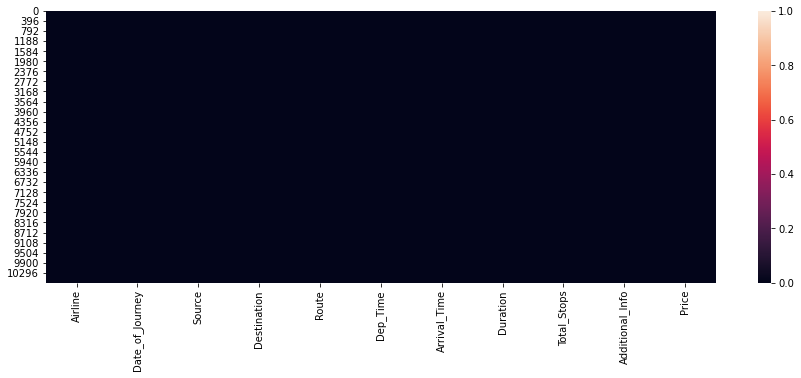

In [10]:
#Checking null values by heatmap
plt.figure(figsize=(15,5))
sns.heatmap(df_train.isnull())
plt.show()

- There is one each, null values present in Route and Total stops column.

In [11]:
df_train.dropna(inplace = True)

- Dropping the null values presnt in this dataset.

In [12]:
#Checking null values:
df_train.isna().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

- All the null values are removed now.

In [13]:
#Counting Airline Column:
df_train['Airline'].value_counts()

Jet Airways                          3849
IndiGo                               2053
Air India                            1751
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64

- The jet Airways is the busiest Airline company in the data given.(four months data),follwed by Indigo and Air India.
- The Trujet Airways is the least busiest airline company having only one flight details.

# EDA:

# - UNIVARIATE ANALYSIS:

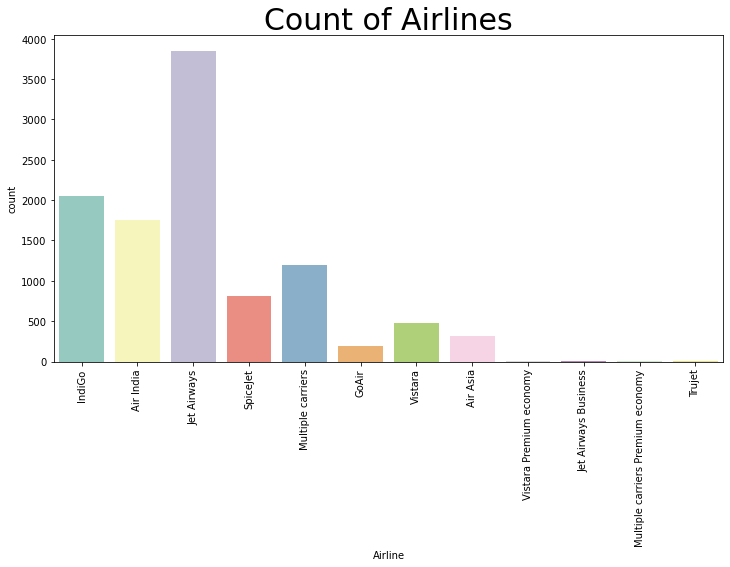

In [14]:
#Plotting Airlines column:
plt.figure(figsize=(12,6))
sns.countplot(df_train['Airline'], palette='Set3')
plt.title('Count of Airlines', size=30)
plt.xticks(rotation=90)
plt.show()

- The jet Airways is the busiest Airline company in the data given.(four months data),follwed by Indigo and Air India.
- The Trujet Airways is the least busiest airline company having only one flight details.

In [15]:
#Counting Source Column:
df_train['Source'].value_counts()

Delhi       4536
Kolkata     2871
Banglore    2197
Mumbai       697
Chennai      381
Name: Source, dtype: int64

- There are main five sources from which the flights starts,they are Delhi,kolkata,Bangalore,Mumbai and chennai.
- Most of the flights starts from Delhi.Delhi is the busiest airport found in this dataset.
- Source chennai is having the least flights.

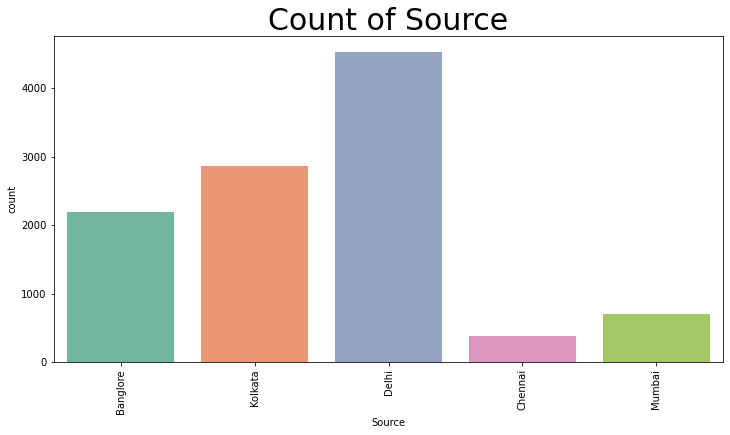

In [16]:
#Plotting source column:
plt.figure(figsize=(12,6))
sns.countplot(df_train['Source'], palette='Set2')
plt.title('Count of Source', size=30)
plt.xticks(rotation=90)
plt.show()

- There are main five sources from which the flights starts,they are Delhi,kolkata,Bangalore,Mumbai and chennai.
- Most of the flights starts from Delhi.Delhi is the busiest airport found in this dataset.
- Source chennai is having the least flights.

In [17]:
#Counting Destination Column:
df_train['Destination'].value_counts()

Cochin       4536
Banglore     2871
Delhi        1265
New Delhi     932
Hyderabad     697
Kolkata       381
Name: Destination, dtype: int64

- There are five destinations,the last stop, found in this dataset,which are Cochin,Bangalore,Delhi,New Delhi,Hyderabad and Kolkata.
- The highest destination found is of Cochin Airport.
- The least destination found is of Kolkata Airport.

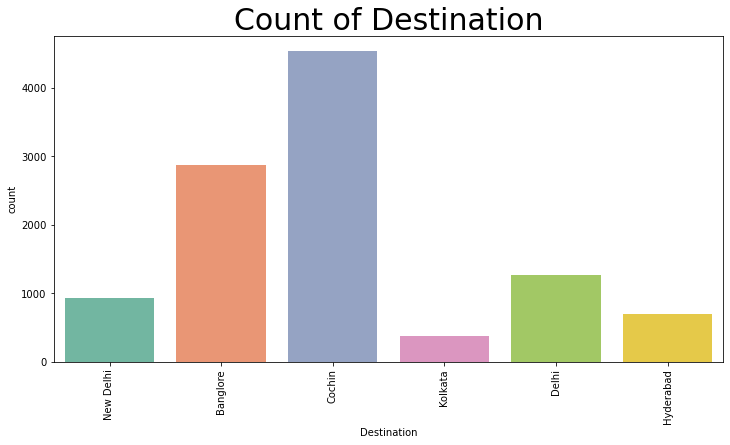

In [18]:
#Plotting Destination column:
plt.figure(figsize=(12,6))
sns.countplot(df_train['Destination'], palette='Set2')
plt.title('Count of Destination', size=30)
plt.xticks(rotation=90)
plt.show()

- There are five destinations,the last stop, found in this dataset,which are Cochin,Bangalore,Delhi,New Delhi,Hyderabad and Kolkata.
- The highest destination found is of Cochin Airport.
- The least destination found is of Kolkata Airport.

In [19]:
#Counting Total_Stops Column:
df_train['Total_Stops'].value_counts()

1 stop      5625
non-stop    3491
2 stops     1520
3 stops       45
4 stops        1
Name: Total_Stops, dtype: int64

- There are five types of stops found,they are 1 stop,non-stop,2 Stops,3 stops and 4 Stops. 
- Most of the flights travel from source to destination by taking only one stop.
- There is only one flight which is having four stops.

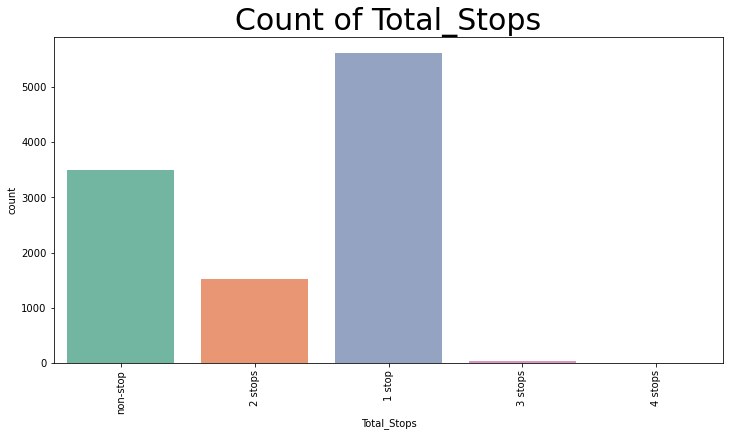

In [20]:
#Plotting Total stops column column:
plt.figure(figsize=(12,6))
sns.countplot(df_train['Total_Stops'], palette='Set2')
plt.title('Count of Total_Stops', size=30)
plt.xticks(rotation=90)
plt.show()

- There are five types of stops found,they are 1 stop,non-stop,2 Stops,3 stops and 4 Stops. 
- Most of the flights travel from source to destination by taking only one stop.
- There is only one flight which is having four stops.

In [21]:
#Counting Route Column:
df_train['Route'].value_counts()

DEL ? BOM ? COK                      2376
BLR ? DEL                            1552
CCU ? BOM ? BLR                       979
CCU ? BLR                             724
BOM ? HYD                             621
                                     ... 
BLR ? HBX ? BOM ? BHO ? DEL             1
CCU ? RPR ? HYD ? BLR                   1
BOM ? UDR ? DEL ? HYD                   1
BOM ? JDH ? JAI ? DEL ? HYD             1
BLR ? CCU ? BBI ? HYD ? VGA ? DEL       1
Name: Route, Length: 128, dtype: int64

- There are total 128 different routes found.

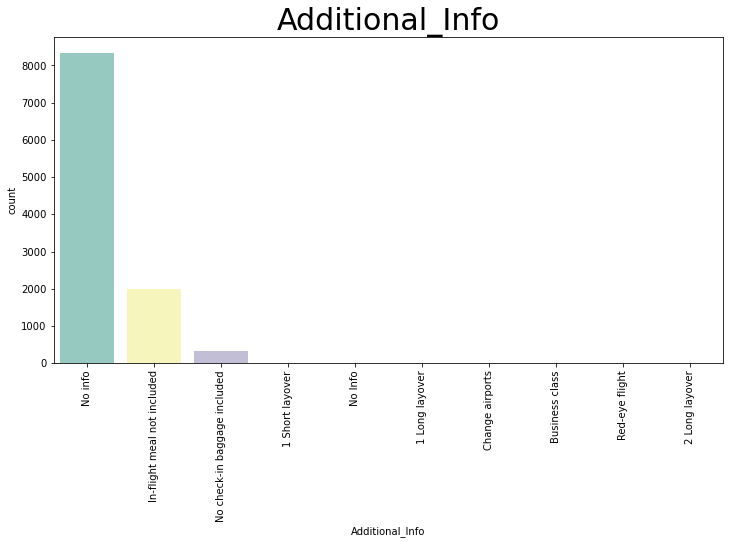

In [22]:
#Plotting Additional info column:
plt.figure(figsize=(12,6))
sns.countplot(df_train['Additional_Info'], palette='Set3')
plt.title('Additional_Info', size=30)
plt.xticks(rotation=90)
plt.show()

- About 80% of the column is having 'no info'. We will remove this column latter.

In [23]:
#Counting Additional_Info Column:
df_train['Additional_Info'].value_counts()

No info                         8344
In-flight meal not included     1982
No check-in baggage included     320
1 Long layover                    19
Change airports                    7
Business class                     4
No Info                            3
Red-eye flight                     1
2 Long layover                     1
1 Short layover                    1
Name: Additional_Info, dtype: int64

- About 80% of the column is having 'no info'. We will remove this column latter.

Minimum 1759
Maximum 79512


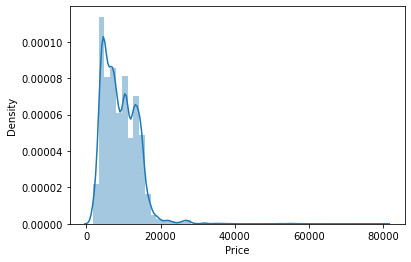

In [24]:
# Plotting the target column 'Price':
sns.distplot(df_train['Price'])
print('Minimum',df_train['Price'].min())
print('Maximum',df_train['Price'].max())

- The maximum Flight price is 79512 and minimum flight price is 1759.

# FEATURE ENGINEERING:

- From description we can see that Date_of_Journey is a object data type,\ Therefore, we have to convert this datatype into timestamp so as to use this column properly for prediction.
- For this we require pandas to_datetime to convert object data type to datetime dtype.
- .dt.day method will extract only day of that date\ *.dt.month method will extract only month of that date.

In [25]:
df_train["Journey_day"] = pd.to_datetime(df_train.Date_of_Journey, format="%d/%m/%Y").dt.day

In [26]:
df_train["Journey_month"] = pd.to_datetime(df_train["Date_of_Journey"], format = "%d/%m/%Y").dt.month

In [27]:
df_train.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR ? DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3
1,Air India,1/05/2019,Kolkata,Banglore,CCU ? IXR ? BBI ? BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,5
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL ? LKO ? BOM ? COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,9,6
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU ? NAG ? BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12,5
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR ? NAG ? DEL,16:50,21:35,4h 45m,1 stop,No info,13302,1,3


In [28]:
df_train.drop(["Date_of_Journey"], axis = 1, inplace = True)


- Journey day and journey month is added separately so deleting the Date_of_Journey column.

In [29]:
df_train.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month
0,IndiGo,Banglore,New Delhi,BLR ? DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3
1,Air India,Kolkata,Banglore,CCU ? IXR ? BBI ? BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,5
2,Jet Airways,Delhi,Cochin,DEL ? LKO ? BOM ? COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,9,6
3,IndiGo,Kolkata,Banglore,CCU ? NAG ? BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12,5
4,IndiGo,Banglore,New Delhi,BLR ? NAG ? DEL,16:50,21:35,4h 45m,1 stop,No info,13302,1,3


- we can see that Date_of_Journey column is deleted.

In [30]:
# Now we will separate the Dep_Time column into Dep_hour and Dep_min by using .dt.hour and .dt.minute method.

In [31]:
df_train["Dep_hour"] = pd.to_datetime(df_train["Dep_Time"]).dt.hour

In [32]:
df_train["Dep_min"] = pd.to_datetime(df_train["Dep_Time"]).dt.minute

In [33]:
df_train.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Dep_hour,Dep_min
0,IndiGo,Banglore,New Delhi,BLR ? DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3,22,20
1,Air India,Kolkata,Banglore,CCU ? IXR ? BBI ? BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,5,5,50
2,Jet Airways,Delhi,Cochin,DEL ? LKO ? BOM ? COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,9,6,9,25
3,IndiGo,Kolkata,Banglore,CCU ? NAG ? BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12,5,18,5
4,IndiGo,Banglore,New Delhi,BLR ? NAG ? DEL,16:50,21:35,4h 45m,1 stop,No info,13302,1,3,16,50


In [34]:
df_train.drop(["Dep_Time"], axis = 1, inplace = True)

- Dep_hour and Dep_min is added separately so deleting theDep_Time column.

In [35]:
df_train.head()

,Airline,Source,Destination,Route,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Dep_hour,Dep_min
0,IndiGo,Banglore,New Delhi,BLR ? DEL,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3,22,20
1,Air India,Kolkata,Banglore,CCU ? IXR ? BBI ? BLR,13:15,7h 25m,2 stops,No info,7662,1,5,5,50
2,Jet Airways,Delhi,Cochin,DEL ? LKO ? BOM ? COK,04:25 10 Jun,19h,2 stops,No info,13882,9,6,9,25
3,IndiGo,Kolkata,Banglore,CCU ? NAG ? BLR,23:30,5h 25m,1 stop,No info,6218,12,5,18,5
4,IndiGo,Banglore,New Delhi,BLR ? NAG ? DEL,21:35,4h 45m,1 stop,No info,13302,1,3,16,50


- we can see that Dep_Time column is deleted.

- Simillarly we will separate the Arrival_Time column into Arrival_hour and Arrival_min by using .dt.hour and .dt.minute method.

In [36]:
df_train["Arrival_hour"] = pd.to_datetime(df_train.Arrival_Time).dt.hour

In [37]:
df_train["Arrival_min"] = pd.to_datetime(df_train.Arrival_Time).dt.minute

In [38]:
df_train.head()

,Airline,Source,Destination,Route,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min
0,IndiGo,Banglore,New Delhi,BLR ? DEL,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3,22,20,1,10
1,Air India,Kolkata,Banglore,CCU ? IXR ? BBI ? BLR,13:15,7h 25m,2 stops,No info,7662,1,5,5,50,13,15
2,Jet Airways,Delhi,Cochin,DEL ? LKO ? BOM ? COK,04:25 10 Jun,19h,2 stops,No info,13882,9,6,9,25,4,25
3,IndiGo,Kolkata,Banglore,CCU ? NAG ? BLR,23:30,5h 25m,1 stop,No info,6218,12,5,18,5,23,30
4,IndiGo,Banglore,New Delhi,BLR ? NAG ? DEL,21:35,4h 45m,1 stop,No info,13302,1,3,16,50,21,35


In [39]:
df_train.drop(["Arrival_Time"], axis = 1, inplace = True)

- Arrival_hour andArrival_min is added separately so deleting the Arrival_Time column.

In [40]:
df_train.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min
0,IndiGo,Banglore,New Delhi,BLR ? DEL,2h 50m,non-stop,No info,3897,24,3,22,20,1,10
1,Air India,Kolkata,Banglore,CCU ? IXR ? BBI ? BLR,7h 25m,2 stops,No info,7662,1,5,5,50,13,15
2,Jet Airways,Delhi,Cochin,DEL ? LKO ? BOM ? COK,19h,2 stops,No info,13882,9,6,9,25,4,25
3,IndiGo,Kolkata,Banglore,CCU ? NAG ? BLR,5h 25m,1 stop,No info,6218,12,5,18,5,23,30
4,IndiGo,Banglore,New Delhi,BLR ? NAG ? DEL,4h 45m,1 stop,No info,13302,1,3,16,50,21,35


- We can see that Arrival_Time column is deleted.

- Time taken by plane to reach destination is called Duration.
- It is the differnce betwwen Departure Time and Arrival time.

- Converting the Duration column into Duration_hours and Duration_mins column.

In [41]:
# Assigning and converting Duration column into list
duration = list(df_train["Duration"])

for i in range(len(duration)):
    if len(duration[i].split()) != 2:    # Check if duration contains only hour or mins
        if "h" in duration[i]:
            duration[i] = duration[i].strip() + " 0m"   # Adds 0 minute
        else:
            duration[i] = "0h " + duration[i]           # Adds 0 hour

duration_hours = []
duration_mins = []
for i in range(len(duration)):
    duration_hours.append(int(duration[i].split(sep = "h")[0]))    # Extract hours from duration
    duration_mins.append(int(duration[i].split(sep = "m")[0].split()[-1]))  

In [42]:
df_train["Duration_hours"] = duration_hours
df_train["Duration_mins"] = duration_mins

In [43]:
df_train.drop(["Duration"], axis = 1, inplace = True)

- Droping the Duration column because we have created the Duration_hours and Duration_mins columns.

In [44]:
df_train.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins
0,IndiGo,Banglore,New Delhi,BLR ? DEL,non-stop,No info,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,CCU ? IXR ? BBI ? BLR,2 stops,No info,7662,1,5,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,DEL ? LKO ? BOM ? COK,2 stops,No info,13882,9,6,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,CCU ? NAG ? BLR,1 stop,No info,6218,12,5,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,BLR ? NAG ? DEL,1 stop,No info,13302,1,3,16,50,21,35,4,45


- We can see that Duration column is deleted.

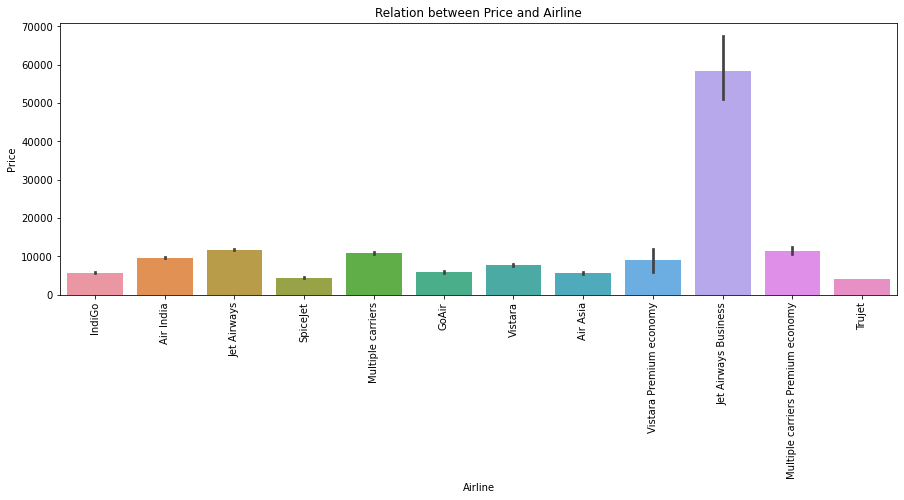

In [45]:
#Plotting Price vs Airline:
plt.figure(figsize=(15,5))
sns.barplot(x='Airline',y='Price',data=df_train).set_title('Relation between Price and Airline')
plt.xticks(rotation=90)
plt.show()


- We can observe that fares are high for Jet airways business. True Jet has the the lowest price.

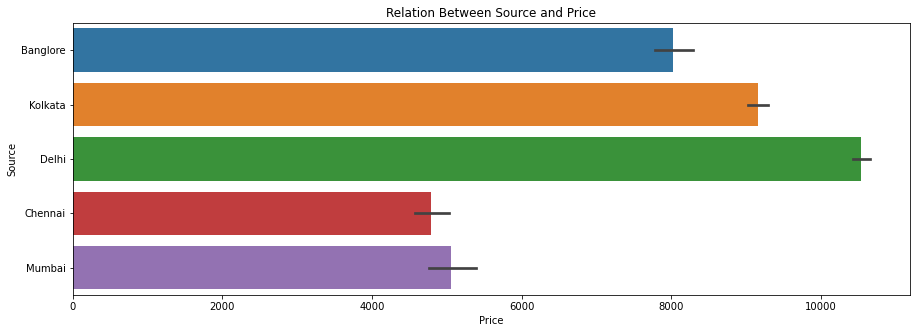

In [46]:
# Plotting Price vs Source column:
plt.figure(figsize=(15,5))
sns.barplot(x='Price',y='Source',data=df_train).set_title('Relation Between Source and Price')
plt.show()


- We can observe that the flights having the Source city Delhi is having the higher Price.
- We can observe that the flights having the Source city Chennai is having the Lowest Price.

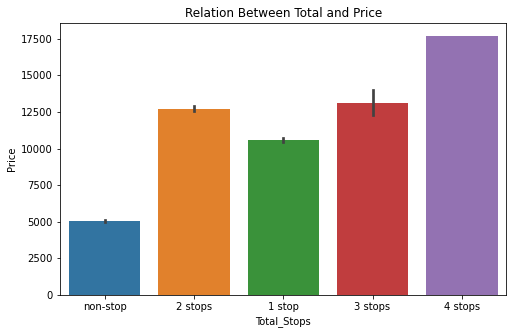

In [47]:
# Plotting Total_Stps vs Price:
plt.figure(figsize=(8,5))
sns.barplot(x='Total_Stops',y='Price',data=df_train).set_title('Relation Between Total and Price')
plt.show()

- Flight with 4 stops has the higher price. This could be because of the higher fuel consumption.

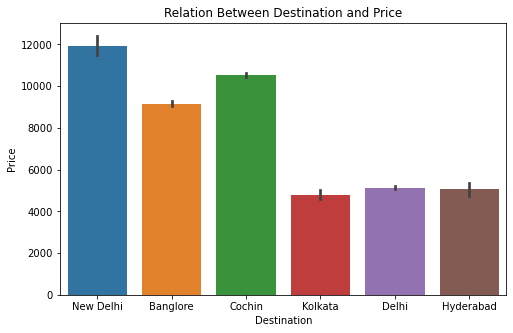

In [48]:
# Plotting Destination vs Price:
plt.figure(figsize=(8,5))
sns.barplot(x='Destination',y='Price',data=df_train).set_title('Relation Between Destination and Price')
plt.show()

- We can observe that the flights having the Destination city New-Delhi is having the highest Price.
- We can observe that the flights having the Destination city Kolkata is having the Lowest Price.

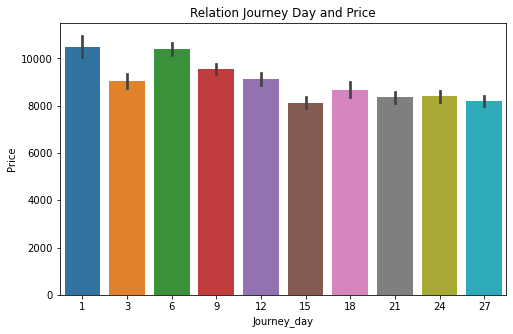

In [49]:
#Plotting Journey day and Price:
plt.figure(figsize=(8,5))
sns.barplot(x='Journey_day',y='Price',data=df_train).set_title('Relation Journey Day and Price')
plt.show()

- We can observe that the first week of the month is higher compared to the last weeks of the month.

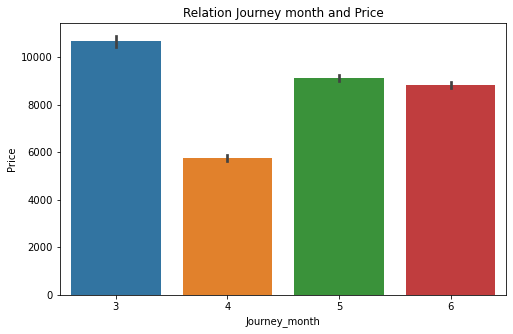

In [50]:
# Plotting Journey month vs Price:
plt.figure(figsize=(8,5))
sns.barplot(x='Journey_month',y='Price',data=df_train).set_title('Relation Journey month and Price')
plt.show()

- As this data consists data of four months,3=March,4=April,5=May and 6=June.we can see that the flights moving in the month of March is highest and the flights moving in the month of April is Lowest.

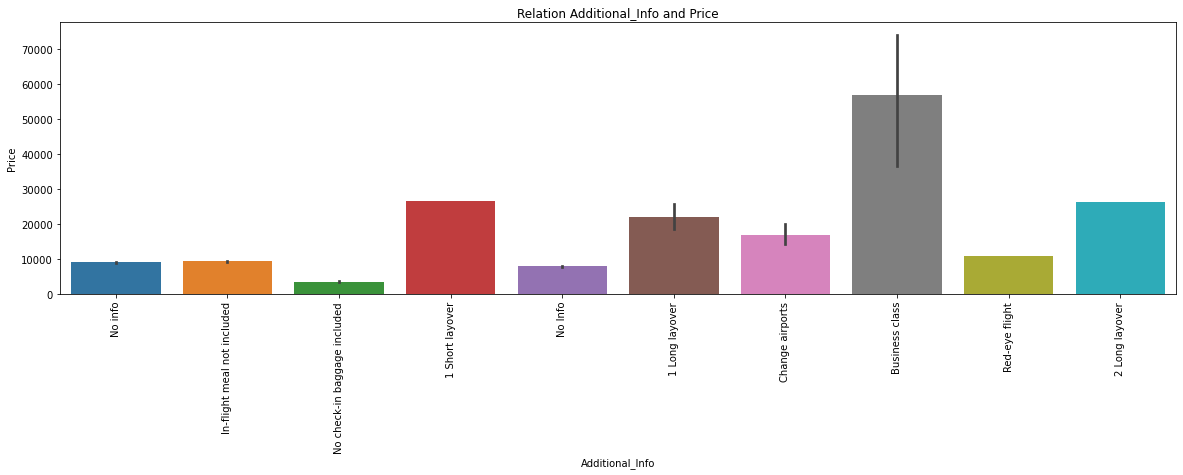

In [51]:
# Plotting Additional indo vs Price.
plt.figure(figsize=(20,5))
sns.barplot(x='Additional_Info',y='Price',data=df_train).set_title('Relation Additional_Info and Price')
plt.xticks(rotation=90)
plt.show()

- Additional_Info also show that price is higher for business class and the lowest for No check-in bagagge.

In [52]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10682 entries, 0 to 10682
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10682 non-null  object
 1   Source           10682 non-null  object
 2   Destination      10682 non-null  object
 3   Route            10682 non-null  object
 4   Total_Stops      10682 non-null  object
 5   Additional_Info  10682 non-null  object
 6   Price            10682 non-null  int64 
 7   Journey_day      10682 non-null  int64 
 8   Journey_month    10682 non-null  int64 
 9   Dep_hour         10682 non-null  int64 
 10  Dep_min          10682 non-null  int64 
 11  Arrival_hour     10682 non-null  int64 
 12  Arrival_min      10682 non-null  int64 
 13  Duration_hours   10682 non-null  int64 
 14  Duration_mins    10682 non-null  int64 
dtypes: int64(9), object(6)
memory usage: 1.6+ MB


In [53]:
# Separating the continous features of the dataset:
df_con_features=df_train[['Price','Journey_day',
                    'Journey_month','Dep_hour',
                    'Dep_min','Arrival_hour','Arrival_min','Duration_hours','Duration_mins']]

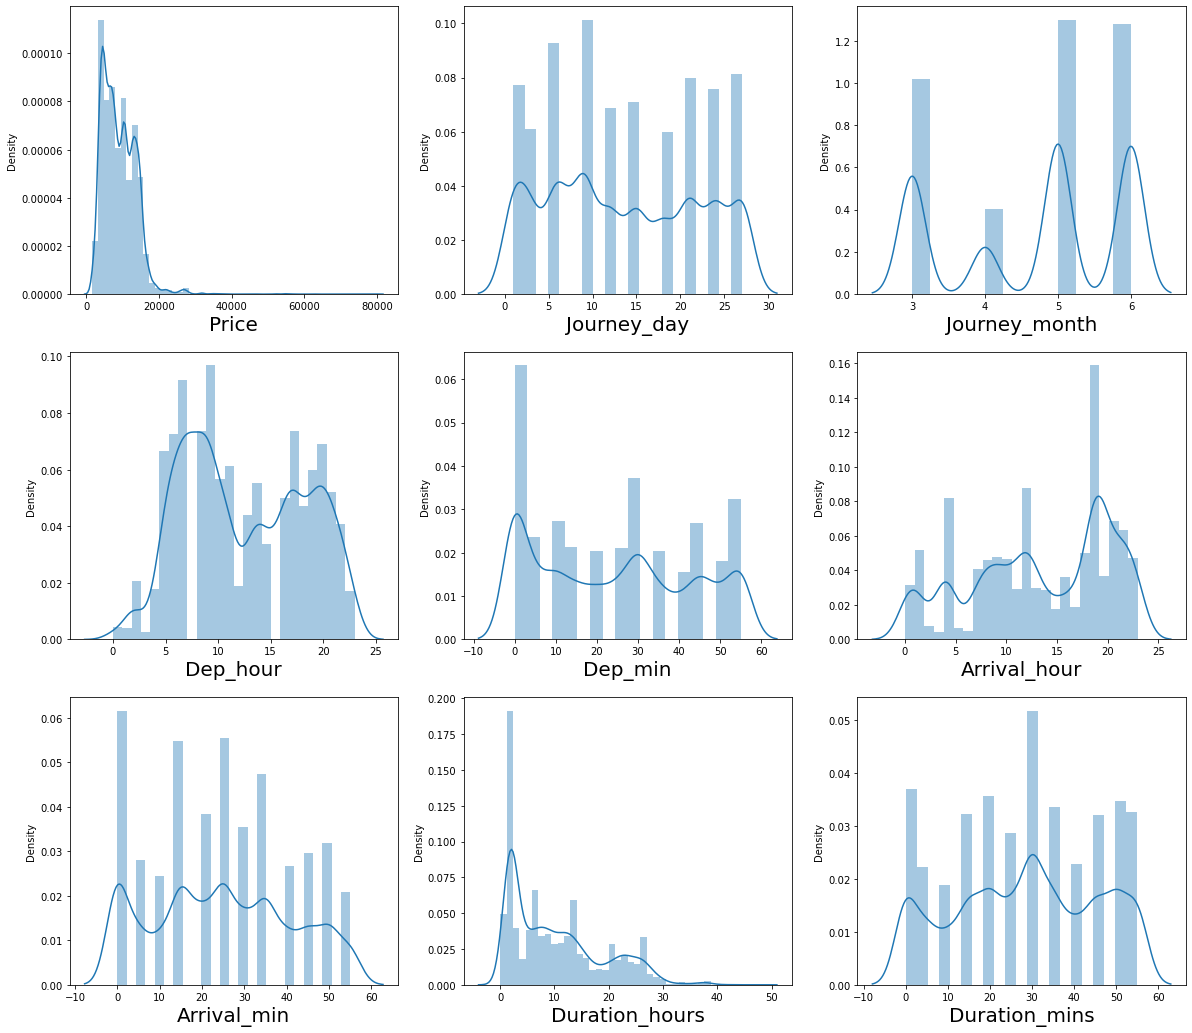

In [54]:
# Checking normal distribution of the continuous features:
plt.figure(figsize=(20,18),facecolor='white')
plotnumber=1
for column in df_con_features:
    if plotnumber<=9:
        ax=plt.subplot(3,3,plotnumber)
        sns.distplot(df_con_features[column],kde=True)
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.show()

- Price column is having Right skewness.
- We can see more or less skewness in all the columns.

Price                 AxesSubplot(0.125,0.71587;0.168478x0.16413)
Journey_day        AxesSubplot(0.327174,0.71587;0.168478x0.16413)
Journey_month      AxesSubplot(0.529348,0.71587;0.168478x0.16413)
Dep_hour           AxesSubplot(0.731522,0.71587;0.168478x0.16413)
Dep_min              AxesSubplot(0.125,0.518913;0.168478x0.16413)
Arrival_hour      AxesSubplot(0.327174,0.518913;0.168478x0.16413)
Arrival_min       AxesSubplot(0.529348,0.518913;0.168478x0.16413)
Duration_hours    AxesSubplot(0.731522,0.518913;0.168478x0.16413)
Duration_mins        AxesSubplot(0.125,0.321957;0.168478x0.16413)
dtype: object

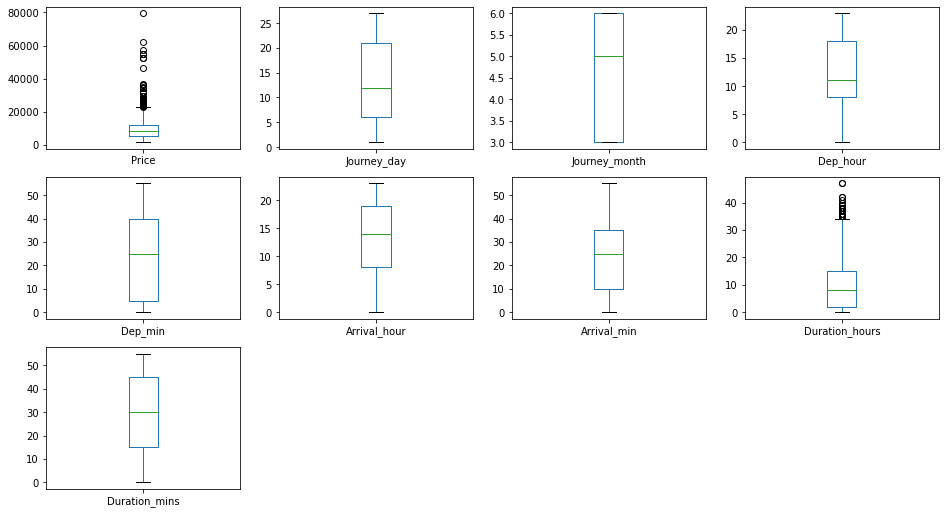

In [55]:
# Checking outliers by using Boxplot:
df_train.plot(kind='box',subplots=True,layout=(4,4),figsize=(16,12))

- We can see outliers in Price and Duration hours column,we will remove the skewness latter.

In [56]:
#let's divide the target variable primary_fuel and features
y = df_train['Price']
x = df_train.drop(columns=['Price'])
x

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins
0,IndiGo,Banglore,New Delhi,BLR ? DEL,non-stop,No info,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,CCU ? IXR ? BBI ? BLR,2 stops,No info,1,5,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,DEL ? LKO ? BOM ? COK,2 stops,No info,9,6,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,CCU ? NAG ? BLR,1 stop,No info,12,5,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,BLR ? NAG ? DEL,1 stop,No info,1,3,16,50,21,35,4,45
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,Kolkata,Banglore,CCU ? BLR,non-stop,No info,9,4,19,55,22,25,2,30
10679,Air India,Kolkata,Banglore,CCU ? BLR,non-stop,No info,27,4,20,45,23,20,2,35
10680,Jet Airways,Banglore,Delhi,BLR ? DEL,non-stop,No info,27,4,8,20,11,20,3,0
10681,Vistara,Banglore,New Delhi,BLR ? DEL,non-stop,No info,1,3,11,30,14,10,2,40


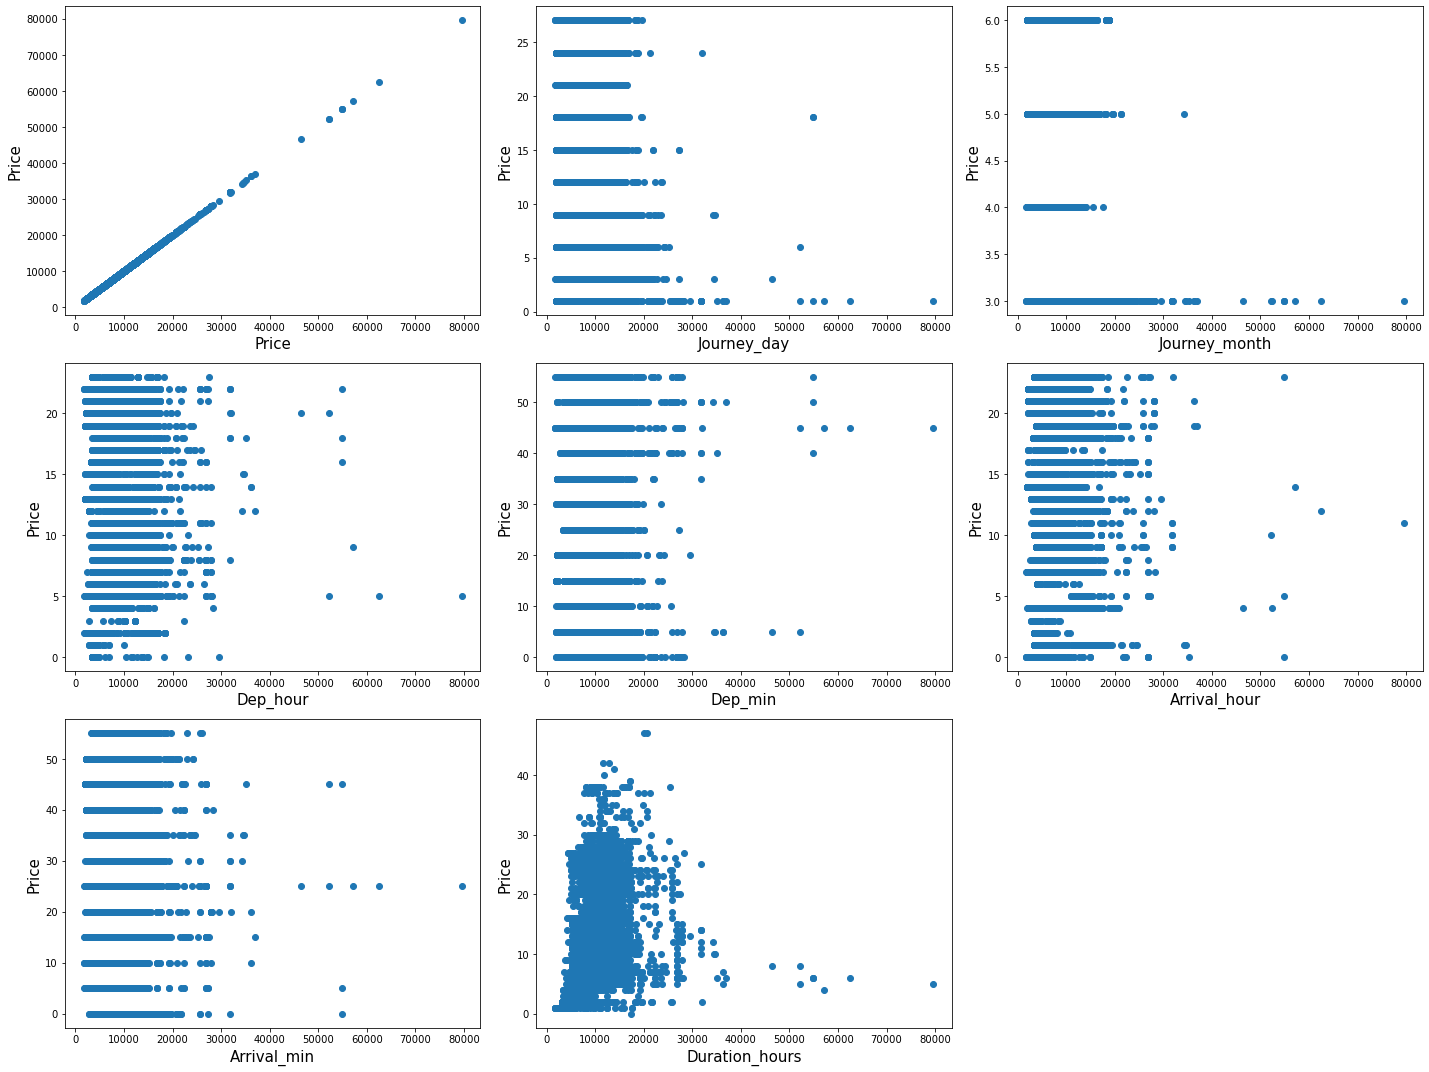

In [57]:
# Checking relation between the target column and the features:
plt.figure(figsize=(20,15),facecolor='white')
plotnumber=1
for column in df_con_features:
    if plotnumber<=8:
        ax=plt.subplot(3,3,plotnumber)
        plt.scatter(y,df_con_features[column])
        plt.xlabel(column,fontsize=15)
        plt.ylabel('Price',fontsize=15)
    plotnumber+=1
plt.tight_layout()

- There is no scuch relation between Price and other features except Duration Hours.

In [58]:
corr = df_train.corr()
corr

,Price,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins
Price,1.000000,-0.153774,-0.103643,0.006799,-0.024458,0.024244,-0.086155,0.508778,-0.124855
Journey_day,-0.153774,1.000000,-0.038359,0.002170,-0.008170,-0.003245,-0.017510,-0.022059,-0.008940
Journey_month,-0.103643,-0.038359,1.000000,0.039127,-0.059267,-0.003927,-0.100626,0.016141,-0.040897
Dep_hour,0.006799,0.002170,0.039127,1.000000,-0.024745,0.005180,0.067911,0.002869,-0.023707
Dep_min,-0.024458,-0.008170,-0.059267,-0.024745,1.000000,0.043122,-0.017597,-0.022104,0.092485
Arrival_hour,0.024244,-0.003245,-0.003927,0.005180,0.043122,1.000000,-0.154363,0.055276,-0.118309
Arrival_min,-0.086155,-0.017510,-0.100626,0.067911,-0.017597,-0.154363,1.000000,-0.074450,0.151628
Duration_hours,0.508778,-0.022059,0.016141,0.002869,-0.022104,0.055276,-0.074450,1.000000,-0.126468
Duration_mins,-0.124855,-0.008940,-0.040897,-0.023707,0.092485,-0.118309,0.151628,-0.126468,1.000000


- There is no such co-relation between the features.
- only Price and Duraton hours is some how co-related.

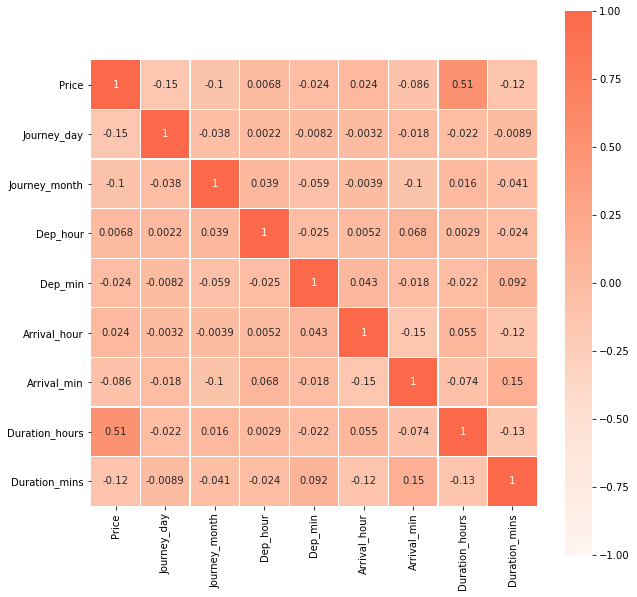

In [59]:
# Checking Multi-colinearity:
plt.figure(figsize=(10,10))
sns.heatmap(corr,cbar=True,cmap='Reds',vmin=-1,vmax=1,square=True,fmt='.2g',annot=True,
            center=True,annot_kws={'size':10},linewidths=.1,linecolor='white')
plt.show()

- There is no such co-relation between the features.
- only Price and Duraton hours is some how co-related.

In [60]:
# CONVERTING THE CATEGORICAL DATA INTO NUMERICAL:

In [61]:
# As Airline is Nominal Categorical data we will perform OneHotEncoding

Airline = df_train[["Airline"]]

Airline = pd.get_dummies(Airline, drop_first= True)

Airline.head()

,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy
0,0,0,1,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0,0


In [62]:
# As Source is Nominal Categorical data we will perform OneHotEncoding

Source = df_train[["Source"]]

Source = pd.get_dummies(Source, drop_first= True)

Source.head()

,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai
0,0,0,0,0
1,0,0,1,0
2,0,1,0,0
3,0,0,1,0
4,0,0,0,0


In [63]:
# As Destination is Nominal Categorical data we will perform OneHotEncoding

Destination = df_train[["Destination"]]

Destination = pd.get_dummies(Destination, drop_first = True)

Destination.head()

,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,0,0,0,1
1,0,0,0,0,0
2,1,0,0,0,0
3,0,0,0,0,0
4,0,0,0,0,1


- We can see that Destination,Source and Airline columns are converted into Numerical data by using One hot Encoder.

In [64]:
# Dropping Route and Additional info column:

df_train.drop(["Route", "Additional_Info"], axis = 1, inplace = True)

-Dropping Route and Additional info column because-
- 80% of the Additional info column consists of no info.
- Route is related to Total no of Stops.

In [65]:
df_train.replace({"non-stop": 0, "1 stop": 1, "2 stops": 2, "3 stops": 3, "4 stops": 4}, inplace = True)

- As this is case of Ordinal Categorical type we perform LabelEncoder.
- Here Values are assigned with corresponding keys.

In [66]:
df_train.head()

,Airline,Source,Destination,Total_Stops,Price,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins
0,IndiGo,Banglore,New Delhi,0,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,2,7662,1,5,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,2,13882,9,6,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,1,6218,12,5,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,1,13302,1,3,16,50,21,35,4,45


In [67]:
# Concatenate dataframe --> train_data + Airline + Source + Destination

data_train = pd.concat([df_train, Airline, Source, Destination], axis = 1)

In [68]:
data_train.head()

,Airline,Source,Destination,Total_Stops,Price,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,...,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,IndiGo,Banglore,New Delhi,0,3897,24,3,22,20,1,...,0,0,0,0,0,0,0,0,0,1
1,Air India,Kolkata,Banglore,2,7662,1,5,5,50,13,...,0,0,0,1,0,0,0,0,0,0
2,Jet Airways,Delhi,Cochin,2,13882,9,6,9,25,4,...,0,0,1,0,0,1,0,0,0,0
3,IndiGo,Kolkata,Banglore,1,6218,12,5,18,5,23,...,0,0,0,1,0,0,0,0,0,0
4,IndiGo,Banglore,New Delhi,1,13302,1,3,16,50,21,...,0,0,0,0,0,0,0,0,0,1


In [69]:
data_train.drop(["Airline", "Source", "Destination"], axis = 1, inplace = True)

- Deleting the columns because we have created the separate columns while using one-hot encoder.

In [70]:
data_train.head()

,Total_Stops,Price,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins,...,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,3897,24,3,22,20,1,10,2,50,...,0,0,0,0,0,0,0,0,0,1
1,2,7662,1,5,5,50,13,15,7,25,...,0,0,0,1,0,0,0,0,0,0
2,2,13882,9,6,9,25,4,25,19,0,...,0,0,1,0,0,1,0,0,0,0
3,1,6218,12,5,18,5,23,30,5,25,...,0,0,0,1,0,0,0,0,0,0
4,1,13302,1,3,16,50,21,35,4,45,...,0,0,0,0,0,0,0,0,0,1


- Now all the column is ready to put it in model for prediction as we have converted all the datas into numerical.

In [71]:
data_train.shape

(10682, 30)

- Now we have 30 columns and 10682 rowsmin the train dataset.

In [72]:
# Checking Skewness:
data_train.skew()

Total_Stops                                    0.317109
Price                                          1.812405
Journey_day                                    0.118174
Journey_month                                 -0.387409
Dep_hour                                       0.112924
Dep_min                                        0.167234
Arrival_hour                                  -0.370146
Arrival_min                                    0.110945
Duration_hours                                 0.851197
Duration_mins                                 -0.090680
Airline_Air India                              1.815902
Airline_GoAir                                  7.217685
Airline_IndiGo                                 1.562601
Airline_Jet Airways                            0.581943
Airline_Jet Airways Business                  42.164359
Airline_Multiple carriers                      2.461548
Airline_Multiple carriers Premium economy     28.616840
Airline_SpiceJet                               3

- We can see huge skewness in Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy,Source_Chennai,Source_Kolkata,Source_Mumbai,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata and Destination_New Delhi columns,We will remove the skewness by using the power transfomer.

# Removing skewness by using Power Transformer.

In [73]:

# We are taking all the skewed continuous features into single variable:
features=['Airline_Air India','Airline_GoAir','Airline_IndiGo','Airline_Jet Airways Business','Airline_Multiple carriers','Airline_Multiple carriers Premium economy','Airline_SpiceJet','Airline_Trujet','Airline_Vistara','Airline_Vistara Premium economy','Source_Chennai','Source_Kolkata','Source_Mumbai','Destination_Delhi','Destination_Hyderabad','Destination_Kolkata','Destination_New Delhi']

In [74]:
scaler=PowerTransformer(method='yeo-johnson')  #using yeo-johnson method

In [75]:

data_train[features]=scaler.fit_transform(data_train[features].values) #scaling the features

In [76]:
data_train[features]

,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy,Source_Chennai,Source_Kolkata,Source_Mumbai,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,-0.442785,-0.136005,2.050151,-0.023707,-0.355078,-0.034907,-0.287972,-0.009676,-0.216673,-0.016761,-0.192319,-0.606266,-0.264206,-0.366513,-0.264206,-0.192319,3.234405
1,2.258432,-0.136005,-0.487769,-0.023707,-0.355078,-0.034907,-0.287972,-0.009676,-0.216673,-0.016761,-0.192319,1.649441,-0.264206,-0.366513,-0.264206,-0.192319,-0.309176
2,-0.442785,-0.136005,-0.487769,-0.023707,-0.355078,-0.034907,-0.287972,-0.009676,-0.216673,-0.016761,-0.192319,-0.606266,-0.264206,-0.366513,-0.264206,-0.192319,-0.309176
3,-0.442785,-0.136005,2.050151,-0.023707,-0.355078,-0.034907,-0.287972,-0.009676,-0.216673,-0.016761,-0.192319,1.649441,-0.264206,-0.366513,-0.264206,-0.192319,-0.309176
4,-0.442785,-0.136005,2.050151,-0.023707,-0.355078,-0.034907,-0.287972,-0.009676,-0.216673,-0.016761,-0.192319,-0.606266,-0.264206,-0.366513,-0.264206,-0.192319,3.234405
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,-0.442785,-0.136005,-0.487769,-0.023707,-0.355078,-0.034907,-0.287972,-0.009676,-0.216673,-0.016761,-0.192319,1.649441,-0.264206,-0.366513,-0.264206,-0.192319,-0.309176
10679,2.258432,-0.136005,-0.487769,-0.023707,-0.355078,-0.034907,-0.287972,-0.009676,-0.216673,-0.016761,-0.192319,1.649441,-0.264206,-0.366513,-0.264206,-0.192319,-0.309176
10680,-0.442785,-0.136005,-0.487769,-0.023707,-0.355078,-0.034907,-0.287972,-0.009676,-0.216673,-0.016761,-0.192319,-0.606266,-0.264206,2.728419,-0.264206,-0.192319,-0.309176
10681,-0.442785,-0.136005,-0.487769,-0.023707,-0.355078,-0.034907,-0.287972,-0.009676,4.615260,-0.016761,-0.192319,-0.606266,-0.264206,-0.366513,-0.264206,-0.192319,3.234405


In [77]:
data_train.skew()

Total_Stops                                    0.317109
Price                                          1.812405
Journey_day                                    0.118174
Journey_month                                 -0.387409
Dep_hour                                       0.112924
Dep_min                                        0.167234
Arrival_hour                                  -0.370146
Arrival_min                                    0.110945
Duration_hours                                 0.851197
Duration_mins                                 -0.090680
Airline_Air India                              1.815902
Airline_GoAir                                  7.217685
Airline_IndiGo                                 1.562601
Airline_Jet Airways                            0.581943
Airline_Jet Airways Business                  42.164359
Airline_Multiple carriers                      2.461548
Airline_Multiple carriers Premium economy     28.616840
Airline_SpiceJet                               3

- We still have skewness in Airline_Jet Airways Business,Airline_Multiple carriers Premium economy,Airline_Trujet,Airline_Vistara Premium economy,Source_Chennai and Destination_Kolkata column.we will be dropping this column below.

In [78]:
data_train.drop(["Airline_Jet Airways Business", "Airline_Multiple carriers Premium economy", "Airline_Trujet",'Airline_Vistara Premium economy','Source_Chennai','Destination_Kolkata'], axis = 1, inplace = True)

In [79]:
data_train.shape

(10682, 24)

- After deleting the above columns now  we have 24 columns.

# NOW WE WILL ANALYZE THE TEST DATA SET:

In [80]:
#READ THE DATASET
df_test=pd.read_csv('C:/Users/HP/Desktop/data sets/Test_set_Flight.csv')
df_test.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL ? BOM ? COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU ? MAA ? BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL ? BOM ? COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL ? BOM ? COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR ? DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info


- It is obvious that test dataset will have less features.It is having 10 features only and there is no target feature available.

In [81]:
df_test.nunique()

Airline             11
Date_of_Journey     44
Source               5
Destination          6
Route              100
Dep_Time           199
Arrival_Time       704
Duration           320
Total_Stops          5
Additional_Info      6
dtype: int64

- It contains the  information about 11 airline companies.
- It contains 5 Sources.
- It contains 6 Destinations.
- There are 5 Total_Stops.
- There are only six Additional_Info

In [82]:
df_test.shape

(2671, 10)

- The dataset contains 2671 rows and 10 columns.

In [83]:
df_test.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info'],
      dtype='object')

- Found out all the column names of the dataset.

In [84]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2671 entries, 0 to 2670
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          2671 non-null   object
 1   Date_of_Journey  2671 non-null   object
 2   Source           2671 non-null   object
 3   Destination      2671 non-null   object
 4   Route            2671 non-null   object
 5   Dep_Time         2671 non-null   object
 6   Arrival_Time     2671 non-null   object
 7   Duration         2671 non-null   object
 8   Total_Stops      2671 non-null   object
 9   Additional_Info  2671 non-null   object
dtypes: object(10)
memory usage: 208.8+ KB


- All the columns are object in nature.

In [85]:
df_test.dtypes

Airline            object
Date_of_Journey    object
Source             object
Destination        object
Route              object
Dep_Time           object
Arrival_Time       object
Duration           object
Total_Stops        object
Additional_Info    object
dtype: object

- All the columns are object in nature.

In [86]:
# Statistical summary:
df_test.describe().T

,count,unique,top,freq
Airline,2671,11,Jet Airways,897
Date_of_Journey,2671,44,9/05/2019,144
Source,2671,5,Delhi,1145
Destination,2671,6,Cochin,1145
Route,2671,100,DEL ? BOM ? COK,624
Dep_Time,2671,199,10:00,62
Arrival_Time,2671,704,19:00,113
Duration,2671,320,2h 50m,122
Total_Stops,2671,5,1 stop,1431
Additional_Info,2671,6,No info,2148


- we can see the highest figures of the features in the top column .

In [87]:
#Checking null values:
df_test.isna().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
dtype: int64

- No null values present in the dataset.

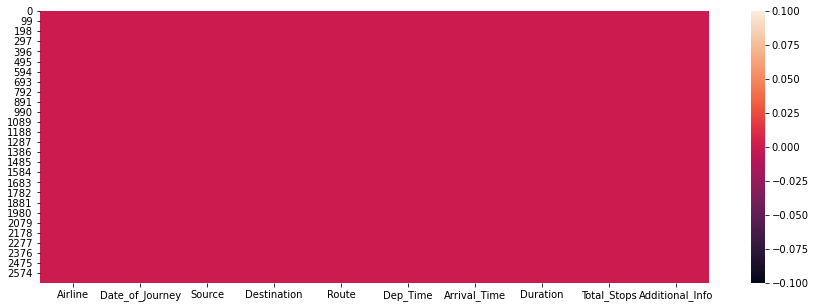

In [88]:
#Checking null values by heatmap
plt.figure(figsize=(15,5))
sns.heatmap(df_test.isnull())
plt.show()

- No null values present in the dataset.

In [89]:
#Counting Airline Column:
df_test['Airline'].value_counts()

Jet Airways                          897
IndiGo                               511
Air India                            440
Multiple carriers                    347
SpiceJet                             208
Vistara                              129
Air Asia                              86
GoAir                                 46
Multiple carriers Premium economy      3
Vistara Premium economy                2
Jet Airways Business                   2
Name: Airline, dtype: int64

- The jet Airways is the busiest Airline company in the data given.(four months data),follwed by Indigo and Air India.
- The Trujet Airways is the least busiest airline company having only two flight details.

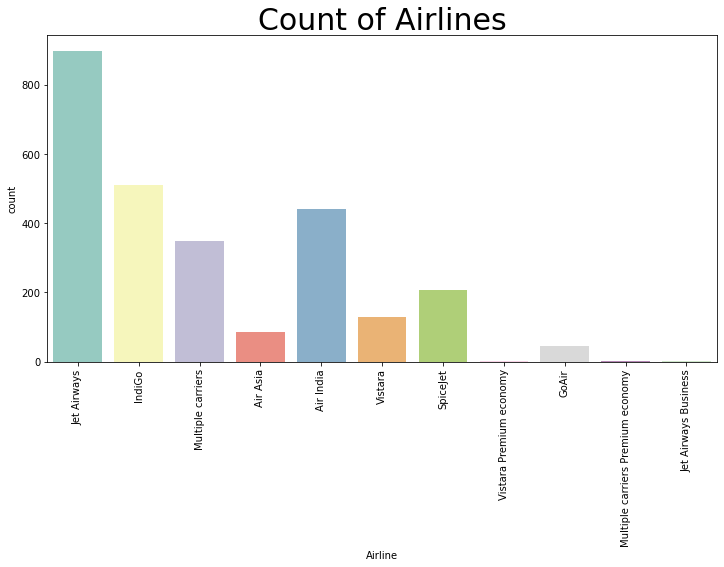

In [90]:
#Plotting Airlines column:
plt.figure(figsize=(12,6))
sns.countplot(df_test['Airline'], palette='Set3')
plt.title('Count of Airlines', size=30)
plt.xticks(rotation=90)
plt.show()

- The jet Airways is the busiest Airline company in the data given.(four months data),follwed by Indigo and Air India.
- The Trujet Airways is the least busiest airline company having only two flight details.

In [91]:
#Counting Source Column:
df_test['Source'].value_counts()

Delhi       1145
Kolkata      710
Banglore     555
Mumbai       186
Chennai       75
Name: Source, dtype: int64

- There are main five sources from which the flights starts,they are Delhi,kolkata,Bangalore,Mumbai and chennai.
- Most of the flights starts from Delhi.Delhi is the busiest airport found in this dataset.
- Source chennai is having the least flights.

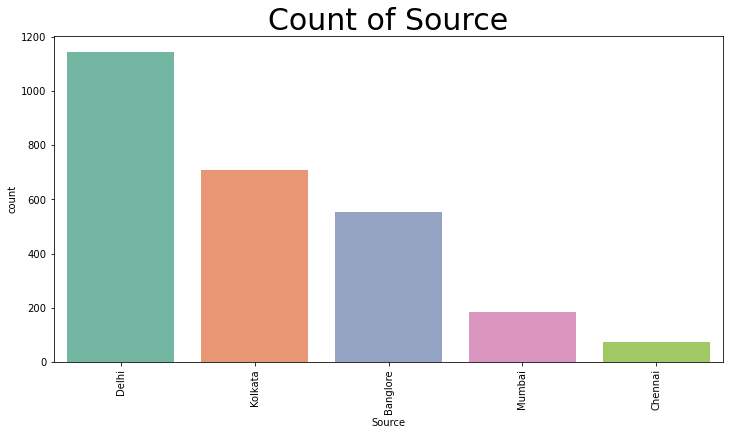

In [92]:
#Plotting source column:
plt.figure(figsize=(12,6))
sns.countplot(df_test['Source'], palette='Set2')
plt.title('Count of Source', size=30)
plt.xticks(rotation=90)
plt.show()

- There are main five sources from which the flights starts,they are Delhi,kolkata,Bangalore,Mumbai and chennai.
- Most of the flights starts from Delhi.Delhi is the busiest airport found in this dataset.
- Source chennai is having the least flights.

In [93]:
#Counting Destination Column:
df_test['Destination'].value_counts()

Cochin       1145
Banglore      710
Delhi         317
New Delhi     238
Hyderabad     186
Kolkata        75
Name: Destination, dtype: int64

- There are five destinations,the last stop, found in this dataset,which are Cochin,Bangalore,Delhi,New Delhi,Hyderabad and Kolkata.
- The highest destination found is of Cochin Airport.
- The least destination found is of Kolkata Airport.

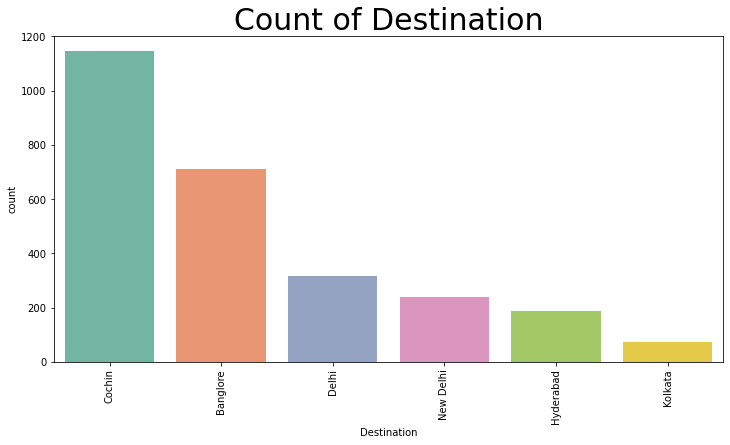

In [94]:
#Plotting source column:
plt.figure(figsize=(12,6))
sns.countplot(df_test['Destination'], palette='Set2')
plt.title('Count of Destination', size=30)
plt.xticks(rotation=90)
plt.show()

- There are five destinations,the last stop, found in this dataset,which are Cochin,Bangalore,Delhi,New Delhi,Hyderabad and Kolkata.
- The highest destination found is of Cochin Airport.
- The least destination found is of Kolkata Airport.

In [95]:
#Counting Total_Stops Column:
df_test['Total_Stops'].value_counts()

1 stop      1431
non-stop     849
2 stops      379
3 stops       11
4 stops        1
Name: Total_Stops, dtype: int64

- There are five types of stops found,they are 1 stop,non-stop,2 Stops,3 stops and 4 Stops.
- Most of the flights travel from source to destination by taking only one stop.
- There is only one flight which is having four stops.

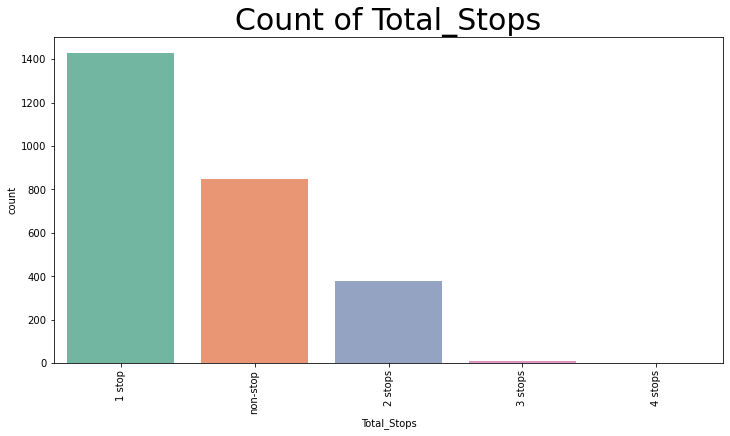

In [96]:
#Plotting source column:
plt.figure(figsize=(12,6))
sns.countplot(df_test['Total_Stops'], palette='Set2')
plt.title('Count of Total_Stops', size=30)
plt.xticks(rotation=90)
plt.show()

- There are five types of stops found,they are 1 stop,non-stop,2 Stops,3 stops and 4 Stops.
- Most of the flights travel from source to destination by taking only one stop.
- There is only one flight which is having four stops.

In [97]:
#Counting Airline Column:
df_test['Route'].value_counts()

DEL ? BOM ? COK                      624
BLR ? DEL                            389
CCU ? BOM ? BLR                      253
CCU ? BLR                            172
BOM ? HYD                            164
                                    ... 
CCU ? BOM ? TRV ? BLR                  1
BLR ? BOM ? JDH ? DEL                  1
BLR ? VGA ? VTZ ? DEL                  1
CCU ? BBI ? IXR ? DEL ? BLR            1
BLR ? CCU ? BBI ? HYD ? VGA ? DEL      1
Name: Route, Length: 100, dtype: int64

- There are total 100 routesin the test data set.

In [98]:
#Counting Airline Column:
df_test['Additional_Info'].value_counts()

No info                         2148
In-flight meal not included      444
No check-in baggage included      76
Business class                     1
1 Long layover                     1
Change airports                    1
Name: Additional_Info, dtype: int64

- About 80% of the column is having 'no info'. We will remove this column latter.

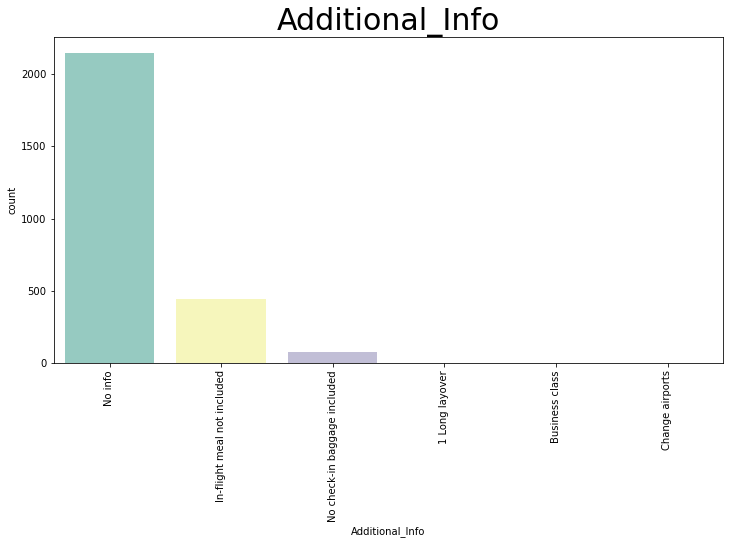

In [99]:
#Plotting Airlines column:
plt.figure(figsize=(12,6))
sns.countplot(df_test['Additional_Info'], palette='Set3')
plt.title('Additional_Info', size=30)
plt.xticks(rotation=90)
plt.show()

About 80% of the column is having 'no info'. We will remove this column latter.

# FEATURE ENGINEERING OF TEST DATA SET:

- From description we can see that Date_of_Journey is a object data type,\ Therefore, we have to convert this datatype into timestamp so as to use this column properly for prediction.
- For this we require pandas to_datetime to convert object data type to datetime dtype.
- .dt.day method will extract only day of that date\ *.dt.month method will extract only month of that date.

In [100]:
df_test["Journey_day"] = pd.to_datetime(df_test.Date_of_Journey, format="%d/%m/%Y").dt.day

In [101]:
df_test["Journey_month_test"] = pd.to_datetime(df_test["Date_of_Journey"], format = "%d/%m/%Y").dt.month

In [102]:
df_test.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Journey_day,Journey_month_test
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL ? BOM ? COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info,6,6
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU ? MAA ? BLR,06:20,10:20,4h,1 stop,No info,12,5
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL ? BOM ? COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included,21,5
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL ? BOM ? COK,08:00,21:00,13h,1 stop,No info,21,5
4,Air Asia,24/06/2019,Banglore,Delhi,BLR ? DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info,24,6


In [103]:
df_test.drop(["Date_of_Journey"], axis = 1, inplace = True)

- Journey day and journey month is added separately so deleting the Date_of_Journey column.

In [104]:
df_test.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Journey_day,Journey_month_test
0,Jet Airways,Delhi,Cochin,DEL ? BOM ? COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info,6,6
1,IndiGo,Kolkata,Banglore,CCU ? MAA ? BLR,06:20,10:20,4h,1 stop,No info,12,5
2,Jet Airways,Delhi,Cochin,DEL ? BOM ? COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included,21,5
3,Multiple carriers,Delhi,Cochin,DEL ? BOM ? COK,08:00,21:00,13h,1 stop,No info,21,5
4,Air Asia,Banglore,Delhi,BLR ? DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info,24,6


-We can see that the Date_of_Journey column is deleted.

In [105]:
# Now we will separate the Dep_Time column into Dep_hour and Dep_min by using .dt.hour and .dt.minute method.

In [106]:
df_test["Dep_hour"] = pd.to_datetime(df_test["Dep_Time"]).dt.hour

In [107]:
df_test["Dep_min"] = pd.to_datetime(df_test["Dep_Time"]).dt.minute

In [108]:
df_test.drop(["Dep_Time"], axis = 1, inplace = True)


- Dep_hour and Dep_min is added separately so deleting theDep_Time column.


In [109]:
df_test.head()

,Airline,Source,Destination,Route,Arrival_Time,Duration,Total_Stops,Additional_Info,Journey_day,Journey_month_test,Dep_hour,Dep_min
0,Jet Airways,Delhi,Cochin,DEL ? BOM ? COK,04:25 07 Jun,10h 55m,1 stop,No info,6,6,17,30
1,IndiGo,Kolkata,Banglore,CCU ? MAA ? BLR,10:20,4h,1 stop,No info,12,5,6,20
2,Jet Airways,Delhi,Cochin,DEL ? BOM ? COK,19:00 22 May,23h 45m,1 stop,In-flight meal not included,21,5,19,15
3,Multiple carriers,Delhi,Cochin,DEL ? BOM ? COK,21:00,13h,1 stop,No info,21,5,8,0
4,Air Asia,Banglore,Delhi,BLR ? DEL,02:45 25 Jun,2h 50m,non-stop,No info,24,6,23,55


- we can see that Dep_Time column is deleted.

- Simillarly we will separate the Arrival_Time column into Arrival_hour and Arrival_min by using .dt.hour and .dt.minute method.

In [110]:
df_test["Arrival_hour"] = pd.to_datetime(df_test.Arrival_Time).dt.hour

In [111]:
df_test["Arrival_min"] = pd.to_datetime(df_test.Arrival_Time).dt.minute

In [112]:
df_test.drop(["Arrival_Time"], axis = 1, inplace = True)

- Arrival_hour andArrival_min is added separately so deleting the Arrival_Time column.


In [113]:
df_test.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Journey_day,Journey_month_test,Dep_hour,Dep_min,Arrival_hour,Arrival_min
0,Jet Airways,Delhi,Cochin,DEL ? BOM ? COK,10h 55m,1 stop,No info,6,6,17,30,4,25
1,IndiGo,Kolkata,Banglore,CCU ? MAA ? BLR,4h,1 stop,No info,12,5,6,20,10,20
2,Jet Airways,Delhi,Cochin,DEL ? BOM ? COK,23h 45m,1 stop,In-flight meal not included,21,5,19,15,19,0
3,Multiple carriers,Delhi,Cochin,DEL ? BOM ? COK,13h,1 stop,No info,21,5,8,0,21,0
4,Air Asia,Banglore,Delhi,BLR ? DEL,2h 50m,non-stop,No info,24,6,23,55,2,45


- We can see that Arrival_Time column is deleted.

- Time taken by plane to reach destination is called Duration.
- It is the differnce betwwen Departure Time and Arrival time.
- Converting the Duration column into Duration_hours and Duration_mins column.

In [114]:
# Assigning and converting Duration column into list
duration = list(df_test["Duration"])

for i in range(len(duration)):
    if len(duration[i].split()) != 2:    # Check if duration contains only hour or mins
        if "h" in duration[i]:
            duration[i] = duration[i].strip() + " 0m"   # Adds 0 minute
        else:
            duration[i] = "0h " + duration[i]           # Adds 0 hour

duration_hours = []
duration_mins = []
for i in range(len(duration)):
    duration_hours.append(int(duration[i].split(sep = "h")[0]))    # Extract hours from duration
    duration_mins.append(int(duration[i].split(sep = "m")[0].split()[-1]))   # Extracts only minutes from duration

In [115]:
df_test["Duration_hours"] = duration_hours
df_test["Duration_mins"] = duration_mins

In [116]:
df_test.drop(["Duration"], axis = 1, inplace = True)

- Droping the Duration column because we have created the Duration_hours and Duration_mins columns.

In [117]:
df_test.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Journey_day,Journey_month_test,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins
0,Jet Airways,Delhi,Cochin,DEL ? BOM ? COK,1 stop,No info,6,6,17,30,4,25,10,55
1,IndiGo,Kolkata,Banglore,CCU ? MAA ? BLR,1 stop,No info,12,5,6,20,10,20,4,0
2,Jet Airways,Delhi,Cochin,DEL ? BOM ? COK,1 stop,In-flight meal not included,21,5,19,15,19,0,23,45
3,Multiple carriers,Delhi,Cochin,DEL ? BOM ? COK,1 stop,No info,21,5,8,0,21,0,13,0
4,Air Asia,Banglore,Delhi,BLR ? DEL,non-stop,No info,24,6,23,55,2,45,2,50


- We can see that Duration column is deleted.

In [118]:
# Separating the continous features of the dataset:
df_con_features1=df_test[['Journey_day',
                    'Dep_hour',
                    'Dep_min','Arrival_hour','Arrival_min','Duration_hours','Duration_mins']]

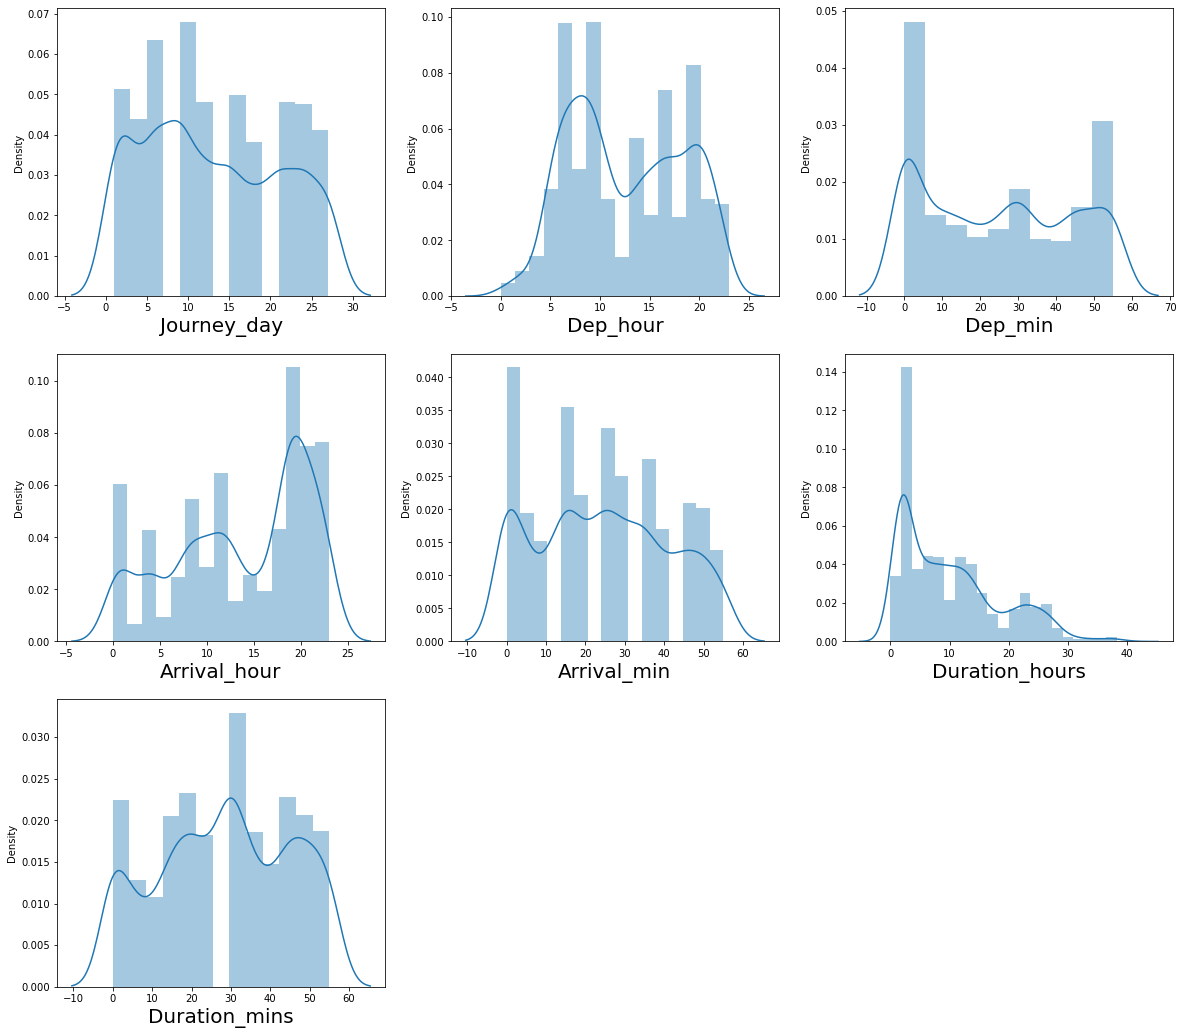

In [119]:
# Checking normal distribution of the continuous features:
plt.figure(figsize=(20,18),facecolor='white')
plotnumber=1
for column in df_con_features1:
    if plotnumber<=9:
        ax=plt.subplot(3,3,plotnumber)
        sns.distplot(df_con_features1[column],kde=True)
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.show()

- We can see more or less skewness in all the columns.

Journey_day               AxesSubplot(0.125,0.71587;0.168478x0.16413)
Journey_month_test     AxesSubplot(0.327174,0.71587;0.168478x0.16413)
Dep_hour               AxesSubplot(0.529348,0.71587;0.168478x0.16413)
Dep_min                AxesSubplot(0.731522,0.71587;0.168478x0.16413)
Arrival_hour             AxesSubplot(0.125,0.518913;0.168478x0.16413)
Arrival_min           AxesSubplot(0.327174,0.518913;0.168478x0.16413)
Duration_hours        AxesSubplot(0.529348,0.518913;0.168478x0.16413)
Duration_mins         AxesSubplot(0.731522,0.518913;0.168478x0.16413)
dtype: object

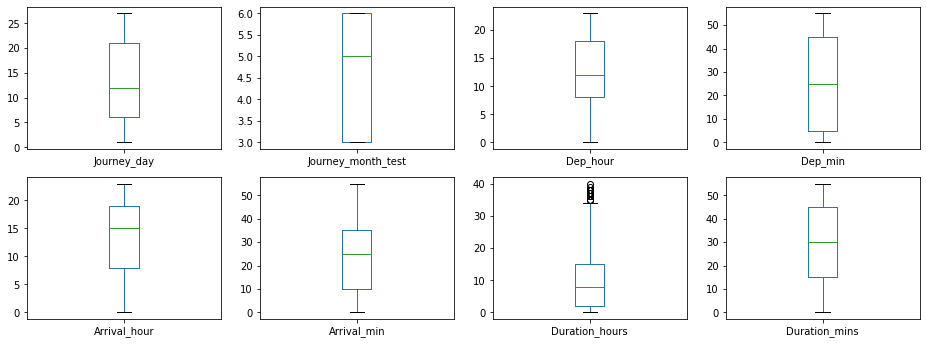

In [120]:
df_test.plot(kind='box',subplots=True,layout=(4,4),figsize=(16,12))

- We can see outliers in Duration hours column,we will remove the skewness latter.

In [121]:
corra = df_test.corr()
corra

,Journey_day,Journey_month_test,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins
Journey_day,1.000000,-0.023324,-0.023386,-0.010510,0.019613,-0.003485,-0.025496,0.018353
Journey_month_test,-0.023324,1.000000,0.015798,-0.109383,-0.000679,-0.148013,-0.016043,-0.059019
Dep_hour,-0.023386,0.015798,1.000000,-0.034524,0.000147,0.066751,-0.019739,-0.022836
Dep_min,-0.010510,-0.109383,-0.034524,1.000000,0.046824,-0.020065,0.020907,0.091169
Arrival_hour,0.019613,-0.000679,0.000147,0.046824,1.000000,-0.136215,0.052277,-0.124326
Arrival_min,-0.003485,-0.148013,0.066751,-0.020065,-0.136215,1.000000,-0.079484,0.175481
Duration_hours,-0.025496,-0.016043,-0.019739,0.020907,0.052277,-0.079484,1.000000,-0.091420
Duration_mins,0.018353,-0.059019,-0.022836,0.091169,-0.124326,0.175481,-0.091420,1.000000


- There is no such relation between the features.

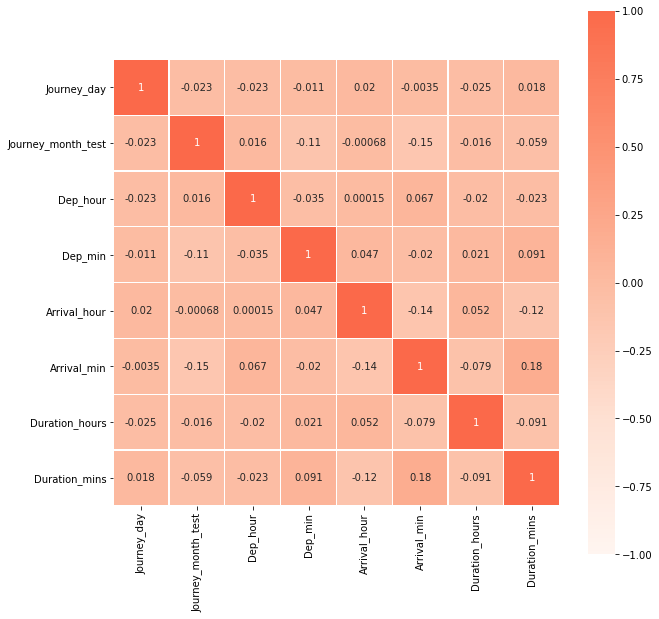

In [122]:
# Checking Multi collinearity by using heat map:
plt.figure(figsize=(10,10))
sns.heatmap(corra,cbar=True,cmap='Reds',vmin=-1,vmax=1,square=True,fmt='.2g',annot=True,
            center=True,annot_kws={'size':10},linewidths=.1,linecolor='white')
plt.show()

- There is no such relation between the features.

In [123]:
# CONVERTING THE CATEGORICAL DATA INTO NUMERICAL:

In [124]:
# As Airline is Nominal Categorical data we will perform OneHotEncoding

Airline1 = df_test[["Airline"]]

Airline1 = pd.get_dummies(Airline1, drop_first= True)

Airline1.head()

,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Vistara,Airline_Vistara Premium economy
0,0,0,0,1,0,0,0,0,0,0
1,0,0,1,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0
3,0,0,0,0,0,1,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0


In [125]:
# As Source is Nominal Categorical data we will perform OneHotEncoding

Source1 = df_test[["Source"]]

Source1 = pd.get_dummies(Source1, drop_first= True)

Source1.head()

,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai
0,0,1,0,0
1,0,0,1,0
2,0,1,0,0
3,0,1,0,0
4,0,0,0,0


In [126]:
# As Destination is Nominal Categorical data we will perform OneHotEncoding

Destination1 = df_train[["Destination"]]

Destination1 = pd.get_dummies(Destination1, drop_first = True)

Destination1.head()

,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,0,0,0,1
1,0,0,0,0,0
2,1,0,0,0,0
3,0,0,0,0,0
4,0,0,0,0,1


- We can see that Destination,Source and Airline columns are converted into Numerical data by using One hot Encoder.

In [127]:
df_test.drop(["Route", "Additional_Info"], axis = 1, inplace = True)

- Dropping Route and Additional info column because-

- 80% of the Additional info column consists of no info.
- Route is related to Total no of Stops.

In [783]:
df_test.replace({"non-stop": 0, "1 stop": 1, "2 stops": 2, "3 stops": 3, "4 stops": 4}, inplace = True)

- As this is case of Ordinal Categorical type we perform LabelEncoder.Here Values are assigned with corresponding keys.

In [784]:
df_test.head()

,Airline,Source,Destination,Total_Stops,Journey_day,Journey_month_test,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins
0,Jet Airways,Delhi,Cochin,1,6,6,17,30,4,25,10,55
1,IndiGo,Kolkata,Banglore,1,12,5,6,20,10,20,4,0
2,Jet Airways,Delhi,Cochin,1,21,5,19,15,19,0,23,45
3,Multiple carriers,Delhi,Cochin,1,21,5,8,0,21,0,13,0
4,Air Asia,Banglore,Delhi,0,24,6,23,55,2,45,2,50


In [785]:
# Concatenate dataframe --> train_data + Airline + Source + Destination

data_test = pd.concat([df_test, Airline, Source, Destination], axis = 1)

In [786]:
df_test.head()

,Airline,Source,Destination,Total_Stops,Journey_day,Journey_month_test,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins
0,Jet Airways,Delhi,Cochin,1,6,6,17,30,4,25,10,55
1,IndiGo,Kolkata,Banglore,1,12,5,6,20,10,20,4,0
2,Jet Airways,Delhi,Cochin,1,21,5,19,15,19,0,23,45
3,Multiple carriers,Delhi,Cochin,1,21,5,8,0,21,0,13,0
4,Air Asia,Banglore,Delhi,0,24,6,23,55,2,45,2,50


In [787]:
data_test.drop(["Airline", "Source", "Destination"], axis = 1, inplace = True)

- Deleting the columns because we have created the separate columns while using one-hot encoder.

In [788]:
data_test.head()

,Total_Stops,Journey_day,Journey_month_test,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins,Airline_Air India,...,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,1.0,6.0,6.0,17.0,30.0,4.0,25.0,10.0,55.0,0,...,0,0,0,0,0,0,0,0,0,1
1,1.0,12.0,5.0,6.0,20.0,10.0,20.0,4.0,0.0,1,...,0,0,0,1,0,0,0,0,0,0
2,1.0,21.0,5.0,19.0,15.0,19.0,0.0,23.0,45.0,0,...,0,0,1,0,0,1,0,0,0,0
3,1.0,21.0,5.0,8.0,0.0,21.0,0.0,13.0,0.0,0,...,0,0,0,1,0,0,0,0,0,0
4,0.0,24.0,6.0,23.0,55.0,2.0,45.0,2.0,50.0,0,...,0,0,0,0,0,0,0,0,0,1


- Now all the column is ready to put it in model for prediction as we have converted all the datas into numerical.

In [789]:
data_test.skew()

Total_Stops                                    0.321364
Journey_day                                    0.199540
Journey_month_test                            -0.403700
Dep_hour                                       0.093759
Dep_min                                        0.128515
Arrival_hour                                  -0.443166
Arrival_min                                    0.115267
Duration_hours                                 0.884647
Duration_mins                                 -0.104482
Airline_Air India                              1.815902
Airline_GoAir                                  7.217685
Airline_IndiGo                                 1.562601
Airline_Jet Airways                            0.581943
Airline_Jet Airways Business                  42.164359
Airline_Multiple carriers                      2.461548
Airline_Multiple carriers Premium economy     28.616840
Airline_SpiceJet                               3.185036
Airline_Trujet                               103

- Having skewness in this columns -'Airline_Air India','Airline_GoAir','Airline_IndiGo','Airline_Jet Airways Business','Airline_Multiple carriers','Airline_Multiple carriers Premium economy','Airline_SpiceJet','Airline_Trujet','Airline_Vistara','Airline_Vistara Premium economy','Source_Chennai','Source_Kolkata','Source_Mumbai','Destination_Delhi','Destination_Hyderabad','Destination_Kolkata','Destination_New Delhi'.We will remove the skewness by using Power Transformer.

# Outlier Removal with Power Transformer:

In [790]:

# We are taking all the skewed continuous features into single variable
features1=['Airline_Air India','Airline_GoAir','Airline_IndiGo','Airline_Jet Airways Business','Airline_Multiple carriers','Airline_Multiple carriers Premium economy','Airline_SpiceJet','Airline_Trujet','Airline_Vistara','Airline_Vistara Premium economy','Source_Chennai','Source_Kolkata','Source_Mumbai','Destination_Delhi','Destination_Hyderabad','Destination_Kolkata','Destination_New Delhi']

In [791]:
scaler1=PowerTransformer(method='yeo-johnson')  #using yeo-johnson method

In [792]:
data_test[features1]=scaler1.fit_transform(data_test[features].values) #scaling the features

In [793]:
data_test[features]

,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy,Source_Chennai,Source_Kolkata,Source_Mumbai,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,-0.442785,-0.136005,2.050151,-0.023707,-0.355078,-0.034907,-0.287972,-0.009676,-0.216673,-0.016761,-0.192319,-0.606266,-0.264206,-0.366513,-0.264206,-0.192319,3.234405
1,2.258432,-0.136005,-0.487769,-0.023707,-0.355078,-0.034907,-0.287972,-0.009676,-0.216673,-0.016761,-0.192319,1.649441,-0.264206,-0.366513,-0.264206,-0.192319,-0.309176
2,-0.442785,-0.136005,-0.487769,-0.023707,-0.355078,-0.034907,-0.287972,-0.009676,-0.216673,-0.016761,-0.192319,-0.606266,-0.264206,-0.366513,-0.264206,-0.192319,-0.309176
3,-0.442785,-0.136005,2.050151,-0.023707,-0.355078,-0.034907,-0.287972,-0.009676,-0.216673,-0.016761,-0.192319,1.649441,-0.264206,-0.366513,-0.264206,-0.192319,-0.309176
4,-0.442785,-0.136005,2.050151,-0.023707,-0.355078,-0.034907,-0.287972,-0.009676,-0.216673,-0.016761,-0.192319,-0.606266,-0.264206,-0.366513,-0.264206,-0.192319,3.234405
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,-0.442785,-0.136005,-0.487769,-0.023707,-0.355078,-0.034907,-0.287972,-0.009676,-0.216673,-0.016761,-0.192319,1.649441,-0.264206,-0.366513,-0.264206,-0.192319,-0.309176
10679,2.258432,-0.136005,-0.487769,-0.023707,-0.355078,-0.034907,-0.287972,-0.009676,-0.216673,-0.016761,-0.192319,1.649441,-0.264206,-0.366513,-0.264206,-0.192319,-0.309176
10680,-0.442785,-0.136005,-0.487769,-0.023707,-0.355078,-0.034907,-0.287972,-0.009676,-0.216673,-0.016761,-0.192319,-0.606266,-0.264206,2.728419,-0.264206,-0.192319,-0.309176
10681,-0.442785,-0.136005,-0.487769,-0.023707,-0.355078,-0.034907,-0.287972,-0.009676,4.615260,-0.016761,-0.192319,-0.606266,-0.264206,-0.366513,-0.264206,-0.192319,3.234405


In [794]:
data_test.skew()

Total_Stops                                    0.321364
Journey_day                                    0.199540
Journey_month_test                            -0.403700
Dep_hour                                       0.093759
Dep_min                                        0.128515
Arrival_hour                                  -0.443166
Arrival_min                                    0.115267
Duration_hours                                 0.884647
Duration_mins                                 -0.104482
Airline_Air India                              1.815902
Airline_GoAir                                  7.217685
Airline_IndiGo                                 1.562601
Airline_Jet Airways                            0.581943
Airline_Jet Airways Business                  42.164359
Airline_Multiple carriers                      2.461548
Airline_Multiple carriers Premium economy     28.616840
Airline_SpiceJet                               3.185036
Airline_Trujet                               103

- We still have skewness in Airline_Jet Airways Business", "Airline_Multiple carriers Premium economy", "Airline_Trujet",'Airline_Vistara Premium economy','Source_Chennai','Destination_Kolkata' columns.we will drop this column below for further prediction.

In [795]:
data_test.drop(["Airline_Jet Airways Business", "Airline_Multiple carriers Premium economy", "Airline_Trujet",'Airline_Vistara Premium economy','Source_Chennai','Destination_Kolkata'], axis = 1, inplace = True)

In [796]:
data_test.shape

(10682, 23)

# Separating the features and target varible:

In [797]:
data_train.columns

Index(['Total_Stops', 'Price', 'Journey_day', 'Journey_month', 'Dep_hour',
       'Dep_min', 'Arrival_hour', 'Arrival_min', 'Duration_hours',
       'Duration_mins', 'Airline_Air India', 'Airline_GoAir', 'Airline_IndiGo',
       'Airline_Jet Airways', 'Airline_Multiple carriers', 'Airline_SpiceJet',
       'Airline_Vistara', 'Source_Delhi', 'Source_Kolkata', 'Source_Mumbai',
       'Destination_Cochin', 'Destination_Delhi', 'Destination_Hyderabad',
       'Destination_New Delhi'],
      dtype='object')

In [798]:
X = data_train.loc[:, ['Total_Stops', 'Journey_day', 'Journey_month', 'Dep_hour',
       'Dep_min', 'Arrival_hour', 'Arrival_min', 'Duration_hours',
       'Duration_mins', 'Airline_Air India', 'Airline_GoAir', 'Airline_IndiGo',
       'Airline_Jet Airways',
       'Airline_Multiple carriers',
       'Airline_SpiceJet',
       'Airline_Vistara',
       'Source_Delhi', 'Source_Kolkata', 'Source_Mumbai',
       'Destination_Cochin', 'Destination_Delhi', 'Destination_Hyderabad',
       'Destination_New Delhi']]
X.head()


,Total_Stops,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins,Airline_Air India,...,Airline_Multiple carriers,Airline_SpiceJet,Airline_Vistara,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_New Delhi
0,0,24,3,22,20,1,10,2,50,-0.442785,...,-0.355078,-0.287972,-0.216673,0,-0.606266,-0.264206,0,-0.366513,-0.264206,3.234405
1,2,1,5,5,50,13,15,7,25,2.258432,...,-0.355078,-0.287972,-0.216673,0,1.649441,-0.264206,0,-0.366513,-0.264206,-0.309176
2,2,9,6,9,25,4,25,19,0,-0.442785,...,-0.355078,-0.287972,-0.216673,1,-0.606266,-0.264206,1,-0.366513,-0.264206,-0.309176
3,1,12,5,18,5,23,30,5,25,-0.442785,...,-0.355078,-0.287972,-0.216673,0,1.649441,-0.264206,0,-0.366513,-0.264206,-0.309176
4,1,1,3,16,50,21,35,4,45,-0.442785,...,-0.355078,-0.287972,-0.216673,0,-0.606266,-0.264206,0,-0.366513,-0.264206,3.234405


In [799]:
y = data_train.iloc[:, 1]
y.head()

0     3897
1     7662
2    13882
3     6218
4    13302
Name: Price, dtype: int64

# Standardizaton:

In [800]:
#Standardizaton with StandardScaler()
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X

,Total_Stops,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins,Airline_Air India,...,Airline_Multiple carriers,Airline_SpiceJet,Airline_Vistara,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_New Delhi
0,0,24,3,22,20,1,10,2,50,-0.442785,...,-0.355078,-0.287972,-0.216673,0,-0.606266,-0.264206,0,-0.366513,-0.264206,3.234405
1,2,1,5,5,50,13,15,7,25,2.258432,...,-0.355078,-0.287972,-0.216673,0,1.649441,-0.264206,0,-0.366513,-0.264206,-0.309176
2,2,9,6,9,25,4,25,19,0,-0.442785,...,-0.355078,-0.287972,-0.216673,1,-0.606266,-0.264206,1,-0.366513,-0.264206,-0.309176
3,1,12,5,18,5,23,30,5,25,-0.442785,...,-0.355078,-0.287972,-0.216673,0,1.649441,-0.264206,0,-0.366513,-0.264206,-0.309176
4,1,1,3,16,50,21,35,4,45,-0.442785,...,-0.355078,-0.287972,-0.216673,0,-0.606266,-0.264206,0,-0.366513,-0.264206,3.234405
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,0,9,4,19,55,22,25,2,30,-0.442785,...,-0.355078,-0.287972,-0.216673,0,1.649441,-0.264206,0,-0.366513,-0.264206,-0.309176
10679,0,27,4,20,45,23,20,2,35,2.258432,...,-0.355078,-0.287972,-0.216673,0,1.649441,-0.264206,0,-0.366513,-0.264206,-0.309176
10680,0,27,4,8,20,11,20,3,0,-0.442785,...,-0.355078,-0.287972,-0.216673,0,-0.606266,-0.264206,0,2.728419,-0.264206,-0.309176
10681,0,1,3,11,30,14,10,2,40,-0.442785,...,-0.355078,-0.287972,4.615260,0,-0.606266,-0.264206,0,-0.366513,-0.264206,3.234405


# Hold out Method:

In [801]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

# BUILDING MODELS:

# 1. KNeighborsRegressor:

In [802]:
#Model training
kn = KNeighborsRegressor()
kn.fit(X_train,y_train)

KNeighborsRegressor()

In [803]:
#Prediction with trained data
yknpred = kn.predict(X_train)

In [375]:
print("R Square Score of kn:", metrics.r2_score(y_train,yknpred))

R Square Score of kn: 0.7535691559227754


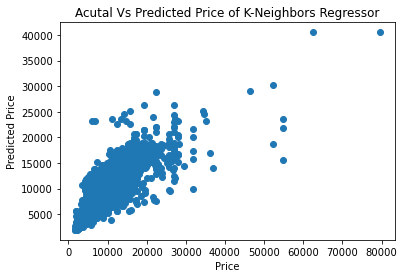

In [376]:
# Checking Actual Vs Predicted using Graph:
plt.scatter(y_train,yknpred)
plt.xlabel('Price')
plt.ylabel('Predicted Price')
plt.title('Acutal Vs Predicted Price of K-Neighbors Regressor')
plt.show()

In [377]:
# Predicting test data with model:
y_test_kn_pred = kn.predict(X_test)

In [378]:
kn_accuracy = metrics.r2_score(y_test,y_test_kn_pred)
print("R Square Score of K-Neighbors Regressor:",kn_accuracy)

R Square Score of K-Neighbors Regressor: 0.6176649236939363


In [379]:
print ('mean absolute error of K-Neighbors Regressor is: ',mean_absolute_error(y_test,y_test_kn_pred))

mean absolute error of K-Neighbors Regressor is:  1778.5130556855404


In [380]:
print ('mean squared error of K-Neighbors Regressor is: ',mean_squared_error(y_test,y_test_kn_pred))

mean squared error of K-Neighbors Regressor is:  8243930.450014039


In [381]:
print ('Root mean squared error of K-Neighbors Regressor is: ',np.sqrt(mean_squared_error(y_test,y_test_kn_pred)))

Root mean squared error of K-Neighbors Regressor is:  2871.2245558322393


# 2. XGB Regressor:

In [382]:
#Model Training
xg = XGBRegressor()
xg.fit(X_train,y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=4, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [383]:
#Prediction with trained data:
yxgpred = xg.predict(X_train)

In [384]:
print("R Square Score of svr:", metrics.r2_score(y_train,yxgpred))

R Square Score of svr: 0.9368031024005307


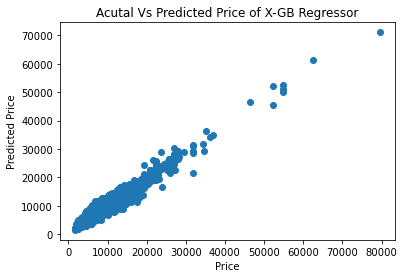

In [385]:
# Checking Actual Vs Predicted using Graph:
plt.scatter(y_train,yxgpred)
plt.xlabel('Price')
plt.ylabel('Predicted Price')
plt.title('Acutal Vs Predicted Price of X-GB Regressor')
plt.show()

In [386]:
# Predicting test data with model:
y_test_xg_pred = xg.predict(X_test)

In [387]:
xg_accuracy = metrics.r2_score(y_test,y_test_xg_pred)
print("R Square Score of  X-GB Regressor:",xg_accuracy)

R Square Score of  X-GB Regressor: 0.8148107495200151


In [388]:
print ('mean absolute error of X-GB Regressor is: ',mean_absolute_error(y_test,y_test_xg_pred))

mean absolute error of X-GB Regressor is:  1177.4489935168497


In [389]:
print ('mean squared error of X-GB Regressor is: ',mean_squared_error(y_test,y_test_xg_pred))

mean squared error of X-GB Regressor is:  3993061.049478739


In [390]:
print ('Root mean squared error of X-GB Regressor is: ',np.sqrt(mean_squared_error(y_test,y_test_xg_pred)))

Root mean squared error of X-GB Regressor is:  1998.2645093877684


# 3.Adaboost Regressor:

In [391]:
#Model Training
abr = AdaBoostRegressor()
abr.fit(X_train,y_train)

AdaBoostRegressor()

In [392]:
#Prediction with trained data:
yabrpred = abr.predict(X_train)

In [393]:
print("R Square Score of AdaBoostRegressor:", metrics.r2_score(y_train,yabrpred))

R Square Score of AdaBoostRegressor: 0.29308080832543204


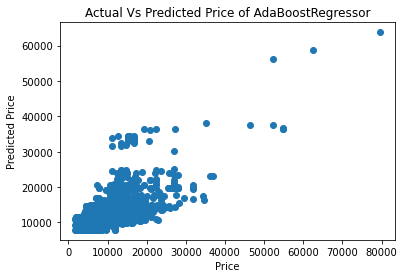

In [394]:
# Checking Actual Vs Predicted using Graph:
plt.scatter(y_train,yabrpred)
plt.xlabel('Price')
plt.ylabel('Predicted Price')
plt.title('Actual Vs Predicted Price of AdaBoostRegressor')
plt.show()

In [395]:
# Predicting test data with model:
y_test_abr_pred = abr.predict(X_test)

In [396]:
abr_accuracy = metrics.r2_score(y_test,y_test_abr_pred)
print("R Square Score of AdaBoostRegressor:",abr_accuracy)

R Square Score of AdaBoostRegressor: 0.2902092304230922


In [397]:
print ('mean absolute error of AdaBoostRegressor: ',mean_absolute_error(y_test,y_test_abr_pred))

mean absolute error of AdaBoostRegressor:  3226.2767224622594


In [398]:
print ('mean squared error of AdaBoostRegressor: ',mean_squared_error(y_test,y_test_abr_pred))

mean squared error of AdaBoostRegressor:  15304548.551987424


In [399]:
print ('Root mean squared error of AdaBoostRegressor: ',np.sqrt(mean_squared_error(y_test,y_test_abr_pred)))

Root mean squared error of AdaBoostRegressor:  3912.1028299352542


# 4. Linear Regression:

In [400]:
#Model Training
lr = LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

In [401]:
#Prediction with trained data:
ylrpred = lr.predict(X_train)

In [402]:
print("R Square Score of Linear Regression:", metrics.r2_score(y_train,ylrpred))

R Square Score of Linear Regression: 0.562048889143507


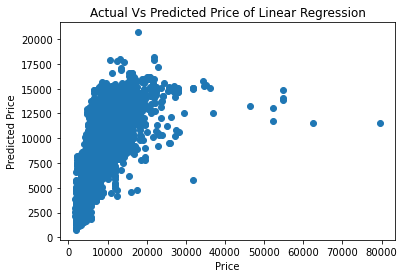

In [403]:
# Checking Actual Vs Predicted using Graph:
plt.scatter(y_train,ylrpred)
plt.xlabel('Price')
plt.ylabel('Predicted Price')
plt.title('Actual Vs Predicted Price of Linear Regression')
plt.show()

In [404]:
# Predicting test data with model:
y_test_lr_pred = lr.predict(X_test)

In [405]:
lr_accuracy = metrics.r2_score(y_test,y_test_lr_pred)
print("R Square Score of Linear Regression:",lr_accuracy)

R Square Score of Linear Regression: 0.5735545618571567


In [406]:
print ('mean absolute error of Linear Regression: ',mean_absolute_error(y_test,y_test_lr_pred))

mean absolute error of Linear Regression:  2013.095073510599


In [407]:
print ('mean squared error of Linear Regression: ',mean_squared_error(y_test,y_test_lr_pred))

mean squared error of Linear Regression:  9195040.556417838


In [408]:
print ('Root mean squared error of Linear Regression: ',np.sqrt(mean_squared_error(y_test,y_test_lr_pred)))

Root mean squared error of Linear Regression:  3032.332527348846


# 5.Random Forrest Regressor:

In [409]:
#Model Training:
rfr = RandomForestRegressor()
rfr.fit(X_train,y_train)

RandomForestRegressor()

In [410]:
#Model Prediction with trained data:
y_rfr_pred = rfr.predict(X_train)

In [411]:
print("R Square Score of Random Forest Regressor:",metrics.r2_score(y_train,y_rfr_pred))

R Square Score of Random Forest Regressor: 0.9502297333359703


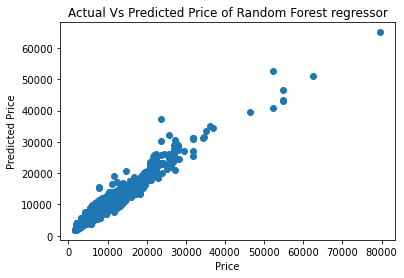

In [412]:
# Checking Actual Vs Predicted using Graph:
plt.scatter(y_train,y_rfr_pred)
plt.xlabel('Price')
plt.ylabel('Predicted Price')
plt.title('Actual Vs Predicted Price of Random Forest regressor')
plt.show()

In [413]:
# Predicting test data with model:
y_test_rfr_pred = rfr.predict(X_test)

In [414]:
rfr_accuracy = metrics.r2_score(y_test,y_test_rfr_pred)
print("R Square Score of Random Forest Regressor:",rfr_accuracy)

R Square Score of Random Forest Regressor: 0.7937006716880655


In [415]:
print ('mean absolute error of Random Forest Regressor: ',mean_absolute_error(y_test,y_test_rfr_pred))

mean absolute error of Random Forest Regressor:  1177.48317337346


In [416]:
print ('mean squared error of Random Forest Regressor is: ',mean_squared_error(y_test,y_test_rfr_pred))

mean squared error of Random Forest Regressor is:  4448237.736698676


In [417]:
print ('Root mean squared error of Random Forest Regressor is: ',np.sqrt(mean_squared_error(y_test,y_test_rfr_pred)))

Root mean squared error of Random Forest Regressor is:  2109.084573149848


# Regularization:

In [418]:
#Regularization with Lasso
lasscv = LassoCV(alphas=None,max_iter=1000,normalize=True)
lasscv.fit(X_train,y_train)

LassoCV(normalize=True)

In [419]:
#best alpha parameter
alpha = lasscv.alpha_
alpha

0.17290346453998137

In [420]:
lasso_reg = Lasso(alpha)
lasso_reg.fit(X_train,y_train)

Lasso(alpha=0.17290346453998137)

In [421]:
lasso_reg.score(X_test,y_test)

0.5735446883370294

In [422]:
# Regularization with Ridge
ridgecv = RidgeCV(alphas=np.arange(0.001,0.1,0.01),normalize=True)
ridgecv.fit(X_train,y_train)

RidgeCV(alphas=array([0.001, 0.011, 0.021, 0.031, 0.041, 0.051, 0.061, 0.071, 0.081,
       0.091]),
        normalize=True)

In [423]:
ridge_alpha= ridgecv.alpha_
ridge_alpha

0.001

In [424]:
ridge_model = Ridge(ridge_alpha)
ridge_model.fit(X_train,y_train)

Ridge(alpha=0.001)

In [425]:
ridge_model.score(X_test,y_test)

0.573554553700559

# CROSS VALIDATION SCORE:

In [426]:
#Cv of KNN Regression
kn_cv_score = cross_val_score(kn,X_train,y_train,cv=5,scoring='r2')
print(kn_cv_score)
print('mean :',kn_cv_score.mean())

[0.61139228 0.58622938 0.57720926 0.49204276 0.57755364]
mean : 0.5688854651043714


In [427]:
#CV of XGB Regressor
xg_cv_score = cross_val_score(xg,X_train,y_train,cv=5,scoring='r2')
print(xg_cv_score)
print('mean :',xg_cv_score.mean())

[0.8385961  0.8465816  0.80775533 0.71965654 0.80556912]
mean : 0.8036317380656026


In [428]:
#CV of Adaboost Regressor
abr_cv_score = cross_val_score(abr,X_train,y_train,cv=5,scoring='r2')
print(abr_cv_score)
print('mean :',abr_cv_score.mean())

[0.16295245 0.335321   0.48286602 0.37919213 0.41274603]
mean : 0.354615524968967


In [429]:
#CV of Linear Regression
lr_cv_score = cross_val_score(lr,X_train,y_train,cv=5,scoring='r2')
print(lr_cv_score)
print('mean :',lr_cv_score.mean())

[0.61217642 0.5526622  0.52011792 0.52954314 0.60026107]
mean : 0.5629521499159635


In [430]:
#CV of Random forrest regressor
rfr_cv_score = cross_val_score(rfr,X_train,y_train,cv=5,scoring='r2')
print(rfr_cv_score)
print('mean :',rfr_cv_score.mean())

[0.78245951 0.80050172 0.78259634 0.71720005 0.79258297]
mean : 0.7750681193755107


- choosing Xgb as the best model because,we got the least difference between the Accuracy score and cross validtion score which is 81.4-80.3=1.1.

# HYPER PARAMETER TUNING OF XGB REGRESSOR:

In [201]:
xg = XGBRegressor()
grid_param= {'learning_rate': [0.01, 0.1],
        'max_depth': [3, 5, 7, 10],
        'colsample_bytree': [0.5, 0.7],
        'n_estimators' : [100, 200, 500],
        'objective':['reg:squarederror']}

In [202]:
gbr_search=GridSearchCV(xg,param_grid=grid_param,scoring='neg_mean_squared_error',n_jobs=1,cv=5)
gbr_search.fit(X_train,y_train)
gbr_search.best_estimator_

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.7, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.01, max_delta_step=0, max_depth=10,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=500, n_jobs=4, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [204]:
xg= XGBRegressor(learning_rate=0.01,max_depth=10,colsample_bytree=0.7,n_estimators=500) 
xg.fit(X_train,y_train)
y_pred=xg.predict(X_test)

In [205]:
print("*** Accuracy Post Tuning***")
print(metrics.r2_score(y_test,y_pred)*100)

*** Accuracy Post Tuning***
82.31220404897451


- After Hyper parameter tuning of the train data model of Xgb regressor we got the score of 82.31%.

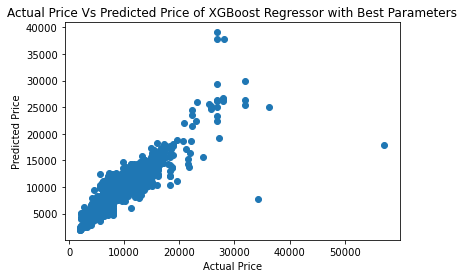

In [449]:
# Checking Actual Price Vs Predicted Price using Graph after Hyperparameter tuning:
plt.scatter(y_test,y_pred)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual Price Vs Predicted Price of XGBoost Regressor with Best Parameters')
plt.show()


# Now putting the Test data into the model:

In [438]:
data_test.columns

Index(['Total_Stops', 'Journey_day', 'Journey_month_test', 'Dep_hour',
       'Dep_min', 'Arrival_hour', 'Arrival_min', 'Duration_hours',
       'Duration_mins', 'Airline_Air India', 'Airline_GoAir', 'Airline_IndiGo',
       'Airline_Jet Airways', 'Airline_Multiple carriers', 'Airline_SpiceJet',
       'Airline_Vistara', 'Source_Delhi', 'Source_Kolkata', 'Source_Mumbai',
       'Destination_Cochin', 'Destination_Delhi', 'Destination_Hyderabad',
       'Destination_New Delhi'],
      dtype='object')

In [439]:
x = data_test.loc[:, ['Total_Stops', 'Journey_day', 'Journey_month_test', 'Dep_hour',
       'Dep_min', 'Arrival_hour', 'Arrival_min', 'Duration_hours',
       'Duration_mins', 'Airline_Air India', 'Airline_GoAir', 'Airline_IndiGo',
       'Airline_Jet Airways', 'Airline_Multiple carriers', 'Airline_SpiceJet',
       'Airline_Vistara', 'Source_Delhi', 'Source_Kolkata', 'Source_Mumbai',
       'Destination_Cochin', 'Destination_Delhi', 'Destination_Hyderabad',
       'Destination_New Delhi']]
x.head()

,Total_Stops,Journey_day,Journey_month_test,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins,Airline_Air India,...,Airline_Multiple carriers,Airline_SpiceJet,Airline_Vistara,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_New Delhi
0,1.0,6.0,6.0,17.0,30.0,4.0,25.0,10.0,55.0,-0.442785,...,-0.355078,-0.287972,-0.216673,0,-0.606266,-0.264206,0,-0.366513,-0.264206,3.234405
1,1.0,12.0,5.0,6.0,20.0,10.0,20.0,4.0,0.0,2.258432,...,-0.355078,-0.287972,-0.216673,0,1.649441,-0.264206,0,-0.366513,-0.264206,-0.309176
2,1.0,21.0,5.0,19.0,15.0,19.0,0.0,23.0,45.0,-0.442785,...,-0.355078,-0.287972,-0.216673,1,-0.606266,-0.264206,1,-0.366513,-0.264206,-0.309176
3,1.0,21.0,5.0,8.0,0.0,21.0,0.0,13.0,0.0,-0.442785,...,-0.355078,-0.287972,-0.216673,0,1.649441,-0.264206,0,-0.366513,-0.264206,-0.309176
4,0.0,24.0,6.0,23.0,55.0,2.0,45.0,2.0,50.0,-0.442785,...,-0.355078,-0.287972,-0.216673,0,-0.606266,-0.264206,0,-0.366513,-0.264206,3.234405


In [440]:
#Standardizaton with StandardScaler()
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)
x

,Total_Stops,Journey_day,Journey_month_test,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins,Airline_Air India,...,Airline_Multiple carriers,Airline_SpiceJet,Airline_Vistara,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_New Delhi
0,1.0,6.0,6.0,17.0,30.0,4.0,25.0,10.0,55.0,-0.442785,...,-0.355078,-0.287972,-0.216673,0,-0.606266,-0.264206,0,-0.366513,-0.264206,3.234405
1,1.0,12.0,5.0,6.0,20.0,10.0,20.0,4.0,0.0,2.258432,...,-0.355078,-0.287972,-0.216673,0,1.649441,-0.264206,0,-0.366513,-0.264206,-0.309176
2,1.0,21.0,5.0,19.0,15.0,19.0,0.0,23.0,45.0,-0.442785,...,-0.355078,-0.287972,-0.216673,1,-0.606266,-0.264206,1,-0.366513,-0.264206,-0.309176
3,1.0,21.0,5.0,8.0,0.0,21.0,0.0,13.0,0.0,-0.442785,...,-0.355078,-0.287972,-0.216673,0,1.649441,-0.264206,0,-0.366513,-0.264206,-0.309176
4,0.0,24.0,6.0,23.0,55.0,2.0,45.0,2.0,50.0,-0.442785,...,-0.355078,-0.287972,-0.216673,0,-0.606266,-0.264206,0,-0.366513,-0.264206,3.234405
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.442785,...,-0.355078,-0.287972,-0.216673,0,1.649441,-0.264206,0,-0.366513,-0.264206,-0.309176
10679,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.258432,...,-0.355078,-0.287972,-0.216673,0,1.649441,-0.264206,0,-0.366513,-0.264206,-0.309176
10680,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.442785,...,-0.355078,-0.287972,-0.216673,0,-0.606266,-0.264206,0,2.728419,-0.264206,-0.309176
10681,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.442785,...,-0.355078,-0.287972,4.615260,0,-0.606266,-0.264206,0,-0.366513,-0.264206,3.234405


In [441]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [444]:
#Model Training
xg = XGBRegressor()
xg.fit(x_train,y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=4, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [445]:
#Prediction with trained data:
yxgpred = xg.predict(x_train)

In [446]:
print("R Square Score of svr:", metrics.r2_score(y_train,yxgpred))

R Square Score of svr: 0.9368031024005307


In [447]:
# Predicting test data with model:
y_test_xg_pred = xg.predict(x_test)

In [448]:
xg_accuracy = metrics.r2_score(y_test,y_test_xg_pred)
print("R Square Score of  X-GB Regressor:",xg_accuracy)

R Square Score of  X-GB Regressor: 0.8148107495200151


In [450]:
# model prediction using XGBRegressor
x_predict = list(xg.predict(x_test))
xg_price = {'predicted_values':x_predict,'orignal_values':y_test}
print(pd.DataFrame(xg_price))

       predicted_values  orignal_values
6075       17268.841797           16655
3544        6074.835938            4959
9291        8244.689453            9187
5032        4104.208008            3858
2483       14467.649414           12898
...                 ...             ...
9797       10346.371094            7408
9871        5497.303223            4622
10063       6071.385742            7452
8802       12380.296875            8824
8617       12651.065430           14151

[2137 rows x 2 columns]


In [451]:
#importing joblib
import joblib

joblib.dump(xg,'xg_Flightpriceprediction.obj')

# SAVING THE MODEL

['xg_Flightpriceprediction.obj']

In [452]:
xg_from_joblib=joblib.load('xg_Flightpriceprediction.obj')
xg_from_joblib.predict(x_test)

#TESTING THE SAVED MODEL

array([17268.842 ,  6074.836 ,  8244.689 , ...,  6071.3857, 12380.297 ,
       12651.065 ], dtype=float32)

# Conclusion:

In the proposed project the overall survey for the dynamic price changes in the flight tickets is presented. this gives the information about the highs and lows in the airfares acording to the days, weekend and time of the day that is morning, evening and night. also the machine learning models in the computational intelligence feild that are evaluated before on different datasets are studied. their accuracy and performances are evaluated and compared in order to get better result. For the prediction of the ticket prices perfectly differnt prediction models are tested for the better prediction accuracy. As the pricing models of the company are developed in order to maximize the revenue management. So to get result with maximum accuracy regression analysis is used. From the studies , the feature that influences the prices of the ticket are to be considered. In future the details about number of availble seats can improve the performance of the model.
- Results we can find after doing the analysis:
- The trend of flight prices vary over various months and across the holiday.
- The airfare varies depending on the time of departure, making timeslot used in analysis an important parameter.
- Airfare varies according to the day of the week of travel. It is higher for weekends and Monday and slightly lower for the other days.
- There are a few times when an offer is run by an airline because of which the prices drop suddenly. These are difficult to incorporate in our mathematical models, and hence lead to error.
